# <div style="background: linear-gradient(135deg, #6e8efb, #a777e3);padding: 30px;border-radius: 15px;box-shadow: 0 4px 15px rgba(0,0,0,0.2);text-align: center;color: white;font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;"><h1 style="margin: 0; font-size: 40px; border: none; color: white;">Анализ личности клиента</h1><p style="margin: 10px 0 0; font-size: 18px; opacity: 0.9; text-align:center">Анализ данных, Кластеризация и создание моделей (+ Интерактивный Дашбоард)</p>
</div>

<div style="
    background-color: #f8f9fa;
    border-left: 8px solid #6e8efb;
    padding: 15px;
    border-radius: 5px;
    font-family: sans-serif;">
    <details>
        <summary style="font-weight: bold; font-size: 20px; cursor: pointer;">Данный файл является сводкой нескольких разных решений и файлов которые можно посмотреть тут</summary>
        <ul style="margin-top: 10px; line-height: 1.8;">
            <li><a href="./notebooks/Elements.ipynb" style="color: #6e8efb; text-decoration: none; font-weight: bold;">Шаблоны элементов для красивого и быстрого оформления markdown</a></li>
            <li><a href="./notebooks/eda.ipynb" style="color: #6e8efb; text-decoration: none; font-weight: bold;">1. EDA, Первончальный анализ данных</a></li>
            <li><a href="./notebooks/clustering.ipynb" style="color: #6e8efb; text-decoration: none; font-weight: bold;">2. Кластеризация и первоначальная обработка данных</a></li>
            <li><a href="./notebooks/classification.ipynb" style="color: #6e8efb; text-decoration: none; font-weight: bold;">3. Класификация и создание моделей</a></li>
            <li><a href="https://yaekitsune13.github.io/MOIBD_coop_project/" style="color: #6e8efb; text-decoration: none; font-weight: bold;">4. dashboard(веб)</a></li>
        </ul>
    </details>
</div>

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
    <strong>ℹ️ Описание:</strong><p>Анализ личности клиента помогает предприятию модифицировать продукт в зависимости от  целевых сегментов. Например, вместо того чтобы тратить деньги на маркетинг нового продукта для каждого клиента в базе данных, компания может проанализировать, какой сегмент наиболее склонен к покупке, и направить маркетинговые усилия именно на эту конкретную группу</p>
    <p>Данное иследование строиться как раз для того чтобы определить к какой группе относится тот или иной человек</p>
</div>

# <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Импорт беблиотек</strong></div>

In [768]:
# --- 1. Основные библиотеки для работы с данными ---
import pandas as pd
import numpy as np
from collections import Counter
import joblib
import pickle

# --- 2. Визуализация ---
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

# --- 3. Математика и статистика ---
from scipy import stats, integrate, optimize

# --- 4. Предобработка данных и Pipeline ---
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Важно: для SMOTE используем Pipeline из imblearn, чтобы избежать утечки данных
from imblearn.pipeline import Pipeline as ImbPipeline 

# --- 5. Понижение размерности и кластеризация ---
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# --- 6. Разделение данных и подбор параметров ---
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    StratifiedKFold
)

# --- 7. Модели классификации ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# --- 8. Метрики качества ---
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    classification_report,
    roc_curve, 
    precision_recall_curve
)

# Настройки отображения (опционально, чтобы таблицы не обрезались)
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Импорт данных</strong></div>

In [769]:
def read_file():
    return pd.read_csv('./data/marketing_campaign.csv',sep='\t')
df = read_file()

### <div style="padding: 15px; border-radius: 10px; background-color: #fff3e0; border-left: 6px solid #ff9800; color: #e65100;font-size:20px"><strong>⚠️ Важно:</strong> Перед запуском этой ячейки убедитесь, что в папке <code>/data</code> лежит файл <code>marketing_campaign.csv</code>.</div>

<div style="background:linear-gradient(135deg,#e3f2fd 0%,#f0e6ff 100%);border-left:6px solid #6e8efb;border-radius:12px;padding:20px 25px;box-shadow:0 4px 18px rgba(110,142,251,0.13);margin-bottom:18px;">
  <span style="font-size:20px;font-weight:800;color:#0d47a1;letter-spacing:1px;">📋 Содержание (Признаки)</span>
  <p style="color:#37474f;margin:8px 0 0;font-size:14px;">Описание всех признаков датасета, разбитых по группам.</p>
</div>

<!-- ======================== ЛЮДИ ======================== -->
<div style="background:linear-gradient(120deg,#e3f2fd 60%,#e8eaff 100%);border-left:6px solid #2196f3;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(33,150,243,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#0d47a1;">👤 Люди (People)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#1565c0;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>ID</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Уникальный идентификатор клиента</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Year_Birth</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Год рождения клиента</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Education</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Уровень образования</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Marital_Status</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Семейное положение</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Income</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Годовой доход домохозяйства клиента</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Kidhome</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество детей в семье</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Teenhome</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество подростков в семье</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Dt_Customer</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Дата регистрации клиента в компании</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Recency</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество дней с момента последней покупки</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;"><strong>Complain</strong></td>
        <td style="padding:8px 14px;color:#263238;">
          <code style="background:#bbdefb;padding:1px 5px;border-radius:4px;">1</code> — жалоба в последние 2 года, инач��
          <code style="background:#bbdefb;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== ПРОДУКТЫ ======================== -->
<div style="background:linear-gradient(120deg,#e8f5e9 60%,#e8eaff 100%);border-left:6px solid #43a047;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(67,160,71,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#1b5e20;">🛒 Продукты (Products)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#2e7d32;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntWines</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на вино за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntFruits</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на фрукты за последние 2 года</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntMeatProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на мясные продукты за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntFishProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на рыбу за последние 2 года</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntSweetProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на сладости за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;"><strong>MntGoldProds</strong></td>
        <td style="padding:8px 14px;color:#263238;">Сумма, потраченная на изделия из золота за последние 2 года</td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== ПРОДВИЖЕНИЕ ======================== -->
<div style="background:linear-gradient(120deg,#fff8e1 60%,#ffe0e0 100%);border-left:6px solid #ffa000;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(255,160,0,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#e65100;">📣 Продвижение (Promotion)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#e65100;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>NumDealsPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">Количество покупок, совершённых со скидкой</td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp1</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>1-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp2</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение во <strong>2-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp3</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>3-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp4</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>4-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp5</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>5-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;"><strong>Response</strong></td>
        <td style="padding:8px 14px;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>последней</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== КАНАЛЫ ПРОДАЖ ======================== -->
<div style="background:linear-gradient(120deg,#fce4ec 60%,#e8eaff 100%);border-left:6px solid #e91e63;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(233,30,99,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#880e4f;">🏪 Каналы продаж (Place)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#880e4f;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumWebPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок через сайт компании</td>
      </tr>
      <tr style="background:rgba(252,228,236,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumCatalogPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок по каталогу</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumStorePurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок непосредственно в магазинах</td>
      </tr>
      <tr style="background:rgba(252,228,236,0.5);">
        <td style="padding:8px 14px;"><strong>NumWebVisitsMonth</strong></td>
        <td style="padding:8px 14px;color:#263238;">Количество посещений сайта за последний месяц</td>
      </tr>
    </tbody>
  </table>
</div>

# <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Метод describe</strong></div>

In [770]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


<div style="background:linear-gradient(135deg,#e3f2fd 0%,#f0e6ff 100%);border-left:6px solid #6e8efb;border-radius:12px;padding:20px 25px;box-shadow:0 4px 18px rgba(110,142,251,0.13);margin-bottom:18px;">
  <span style="font-size:20px;font-weight:800;color:#0d47a1;letter-spacing:1px;">📋 Содержание (Признаки)</span>
  <p style="color:#37474f;margin:8px 0 0;font-size:14px;">Описание всех признаков датасета, разбитых по группам.</p>
</div>

<!-- ======================== ЛЮДИ ======================== -->
<div style="background:linear-gradient(120deg,#e3f2fd 60%,#e8eaff 100%);border-left:6px solid #2196f3;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(33,150,243,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#0d47a1;">👤 Люди (People)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#1565c0;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>ID</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Уникальный идентификатор клиента</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Year_Birth</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Год рождения клиента</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Education</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Уровень образования</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Marital_Status</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Семейное положение</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Income</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Годовой доход домохозяйства клиента</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Kidhome</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество детей в семье</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Teenhome</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество подростков в семье</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Dt_Customer</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Дата регистрации клиента в компании</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Recency</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество дней с момента последней покупки</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;"><strong>Complain</strong></td>
        <td style="padding:8px 14px;color:#263238;">
          <code style="background:#bbdefb;padding:1px 5px;border-radius:4px;">1</code> — жалоба в последние 2 года, инач��
          <code style="background:#bbdefb;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== ПРОДУКТЫ ======================== -->
<div style="background:linear-gradient(120deg,#e8f5e9 60%,#e8eaff 100%);border-left:6px solid #43a047;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(67,160,71,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#1b5e20;">🛒 Продукты (Products)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#2e7d32;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntWines</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на вино за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntFruits</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на фрукты за последние 2 года</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntMeatProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на мясные продукты за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntFishProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на рыбу за последние 2 года</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntSweetProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на сладости за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;"><strong>MntGoldProds</strong></td>
        <td style="padding:8px 14px;color:#263238;">Сумма, потраченная на изделия из золота за последние 2 года</td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== ПРОДВИЖЕНИЕ ======================== -->
<div style="background:linear-gradient(120deg,#fff8e1 60%,#ffe0e0 100%);border-left:6px solid #ffa000;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(255,160,0,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#e65100;">📣 Продвижение (Promotion)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#e65100;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>NumDealsPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">Количество покупок, совершённых со скидкой</td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp1</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>1-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp2</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение во <strong>2-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp3</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>3-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp4</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>4-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp5</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>5-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;"><strong>Response</strong></td>
        <td style="padding:8px 14px;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>последней</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== КАНАЛЫ ПРОДАЖ ======================== -->
<div style="background:linear-gradient(120deg,#fce4ec 60%,#e8eaff 100%);border-left:6px solid #e91e63;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(233,30,99,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#880e4f;">🏪 Каналы продаж (Place)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#880e4f;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumWebPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок через сайт компании</td>
      </tr>
      <tr style="background:rgba(252,228,236,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumCatalogPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок по каталогу</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumStorePurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок непосредственно в магазинах</td>
      </tr>
      <tr style="background:rgba(252,228,236,0.5);">
        <td style="padding:8px 14px;"><strong>NumWebVisitsMonth</strong></td>
        <td style="padding:8px 14px;color:#263238;">Количество посещений сайта за последний месяц</td>
      </tr>
    </tbody>
  </table>
</div>

# <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Поиск пустых полей</strong></div>

In [771]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
    <strong>Вывод: </strong>Подметили что есть пустые значения в поле Income
</div>

# <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Поиск дубликатов</strong></div>

In [772]:
df.duplicated().sum()

np.int64(0)

# <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Поиск уникальных значений</strong></div>

In [773]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# <div style="padding: 15px; border-radius: 10px; background: rgb(194, 208, 255); border: 1px solid rgba(110, 142, 251, 0.3);border-left: 10px solid #6e8efb; color: #4a148c; font-size: 32px; text-align: center;"><strong>Анализ данных</strong></div>

In [774]:
df_eda = df.copy()

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Дропаем лишние поля которые не являються полезными для анализа данных (Удалённые поля участвуют в расчёте затрат)</strong></div>

In [775]:
drop_cols = ['Z_CostContact', 'Z_Revenue']
df_eda = df_eda.drop(columns=[col for col in drop_cols if col in df_eda.columns])

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Создаём поле для расчёта среднего дахода людей с одинаковым образованием и семейным положением</strong></div>

In [776]:
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income']\
                 .transform(lambda x: x.fillna(x.median()))

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Проверяем на пустые поля</strong></div>

In [777]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Общие траты </strong></div>


In [778]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_eda['Total_Spending'] = df_eda[spending_cols].sum(axis=1)


## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Общие покупки</strong></div>


In [779]:
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 
                 'NumCatalogPurchases', 'NumStorePurchases']
df_eda['Total_Purchases'] = df_eda[purchase_cols].sum(axis=1)


## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Средний чек</strong></div>


In [780]:
df_eda['Avg_Check'] = df_eda['Total_Spending'] / df_eda['Total_Purchases'].replace(0, np.nan)


## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Участие в кампаниях</strong></div>


In [781]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                 'AcceptedCmp4', 'AcceptedCmp5']
df_eda['Total_Accepted_Cmp'] = df_eda[campaign_cols].sum(axis=1)
df_eda['Accepted_Any'] = (df_eda['Total_Accepted_Cmp'] > 0).astype(int)


## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>График распределения дохода</strong></div>


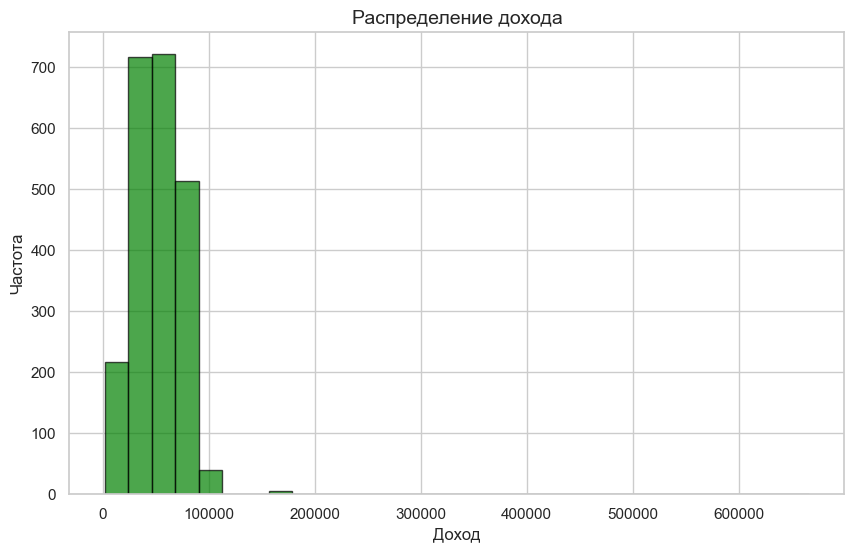

In [782]:
plt.figure(figsize=(10, 6))
plt.hist(df_eda['Income'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='green')
plt.title('Распределение дохода', fontsize=14)
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>ℹ️ Анализ распределения дохода:</strong>
<p>Большинство клиентов имеют доход в диапазоне от 25 000 до 75 000, что формирует основной костяк целевой аудитории. Распределение имеет ярко выраженный «длинный хвост» вправо, указывающий на наличие небольшой группы клиентов с доходами выше среднего.</p>
</div>



## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>График распределения общих трат</strong></div>


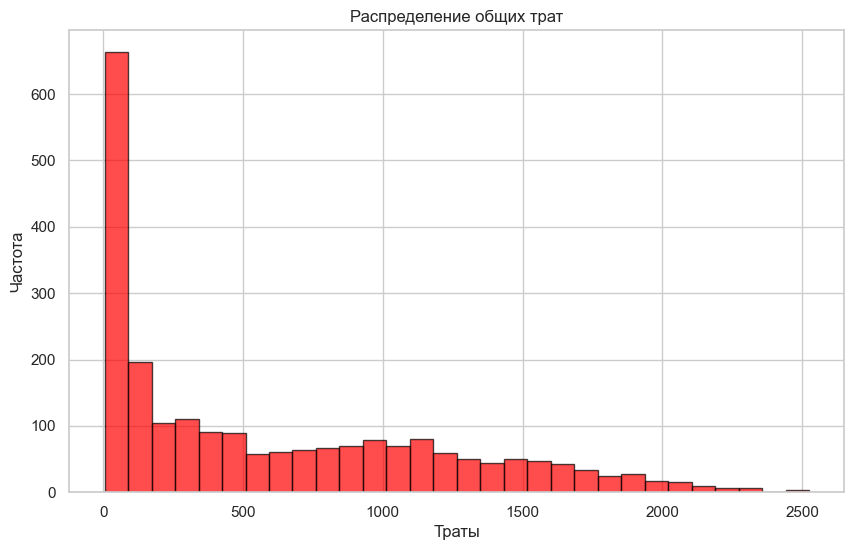

In [783]:
# Общие траты
plt.figure(figsize=(10, 6))
plt.hist(df_eda['Total_Spending'], bins=30, edgecolor='black', alpha=0.7, color='red')
plt.title('Распределение общих трат')
plt.xlabel('Траты')
plt.ylabel('Частота')
plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>ℹ️ Анализ распределения трат:</strong>
<p>График демонстрирует выраженное правостороннее смещение: подавляющее большинство клиентов совершают покупки на минимальные суммы (пик в диапазоне от 0 до 100-200 единиц). Это может указывать на большое количество разовых или пробных покупок в базе данных.</p>
<p>Так же Наличие «длинного хвоста», доходящего до 2500 единиц, свидетельствует о существовании сегмента высокодоходных клиентов. Для бизнеса это сигнал о необходимости разных подходов: стимулирование повторных покупок у массового сегмента и внедрение программ лояльности для удержания клиентов с высокими тратами.</p>
</div>


## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>График распределения образования</strong></div>


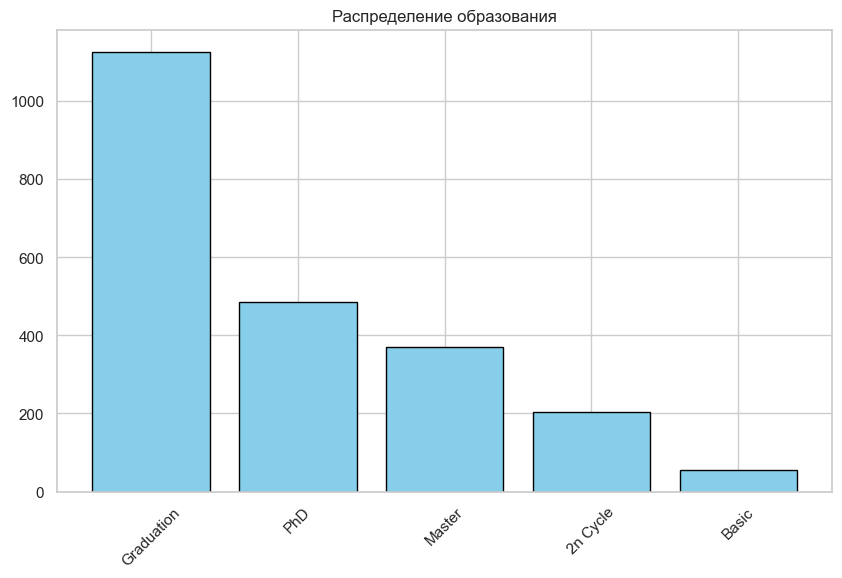

In [784]:
edu_counts = df_eda['Education'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(edu_counts.index, edu_counts.values, color='skyblue', edgecolor='black')
plt.title('Распределение образования')
plt.tick_params(axis='x', rotation=45)
plt.show()


<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>ℹ️ Анализ уровня образования:</strong>
<p>Подавляющее большинство клиентов в выборке имеют высшее образование (категория «Graduation» значительно превосходит остальные). Это характеризует целевую аудиторию как образованную и, вероятно, обладающую определенным социальным статусом и покупательской способностью.</p>
<p>Значительная доля клиентов со степенями PhD и Master подтверждает высокий интеллектуальный профиль базы. Группы с базовым («Basic») образованием представлены минимально, что позволяет компании адаптировать маркетинговые сообщения под более квалифицированный сегмент потребителей.</p>
</div>


## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Семейное положение</strong></div>


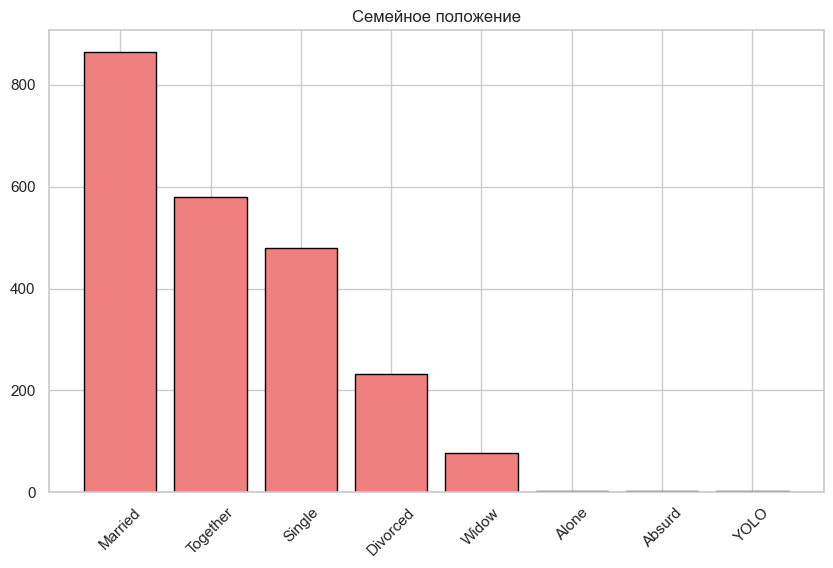

In [785]:
plt.figure(figsize=(10, 6))
marital_counts = df_eda['Marital_Status'].value_counts()
plt.bar(marital_counts.index, marital_counts.values, color='lightcoral', edgecolor='black')
plt.title('Семейное положение')
plt.tick_params(axis='x', rotation=45)
plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>ℹ️ Анализ семейного положения:</strong>
<p>Основную долю клиентов составляют люди, состоящие в отношениях (категории «Married» и «Together»). Это важный инсайт для маркетинга: продукты и акции, ориентированные на семейное потребление или домохозяйства, будут иметь наибольший охват.</p>
<p>Также график выявил наличие «шумовых» или редких категорий, таких как «Alone», «Absurd» и «YOLO». Для качественного построения моделей машинного обучения или более четкой сегментации данные значения рекомендуется объединить с более крупными группами (например, отнести к «Single») или обработать как выбросы.</p>
</div>


## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Средние траты по категориям</strong></div>


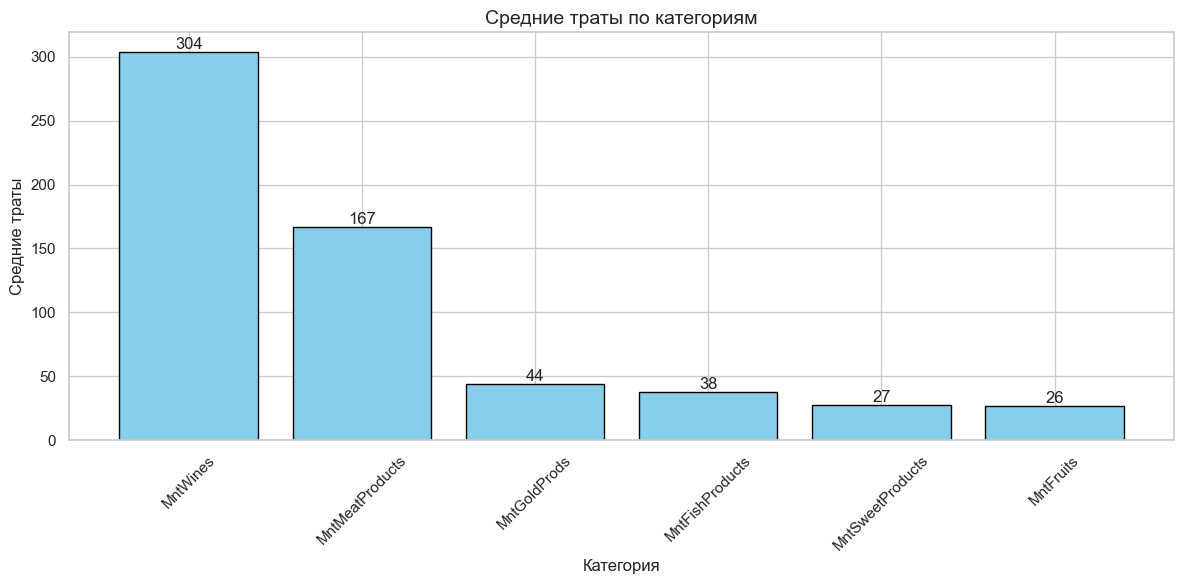

In [786]:
# Средние траты по категориям
avg_spending = df_eda[spending_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(avg_spending.index, avg_spending.values, color='skyblue', edgecolor='black')
plt.title('Средние траты по категориям', fontsize=14)
plt.xlabel('Категория')
plt.ylabel('Средние траты')
plt.xticks(rotation=45)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>ℹ️ Анализ средних трат по категориям:</strong>
<p>На графике отчетливо видно, что вино (<b>MntWines</b>) является безусловным лидером в структуре расходов клиентов, составляя в среднем 304 единицы. Это ключевая категория, которая вносит наибольший вклад в общую выручку.</p>
<p>Второе место по значимости занимают мясные продукты (<b>MntMeatProducts</b>) с показателем 167. Остальные группы товаров (золото, рыба, сладости и фрукты) имеют значительно более низкий средний чек. Такие данные позволяют сфокусировать маркетинговые кампании на флагманских продуктах или разработать стратегии кросс-продаж для подтягивания второстепенных категорий.</p>
</div>


## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Массивный hist с выводом всех графиков</strong></div>


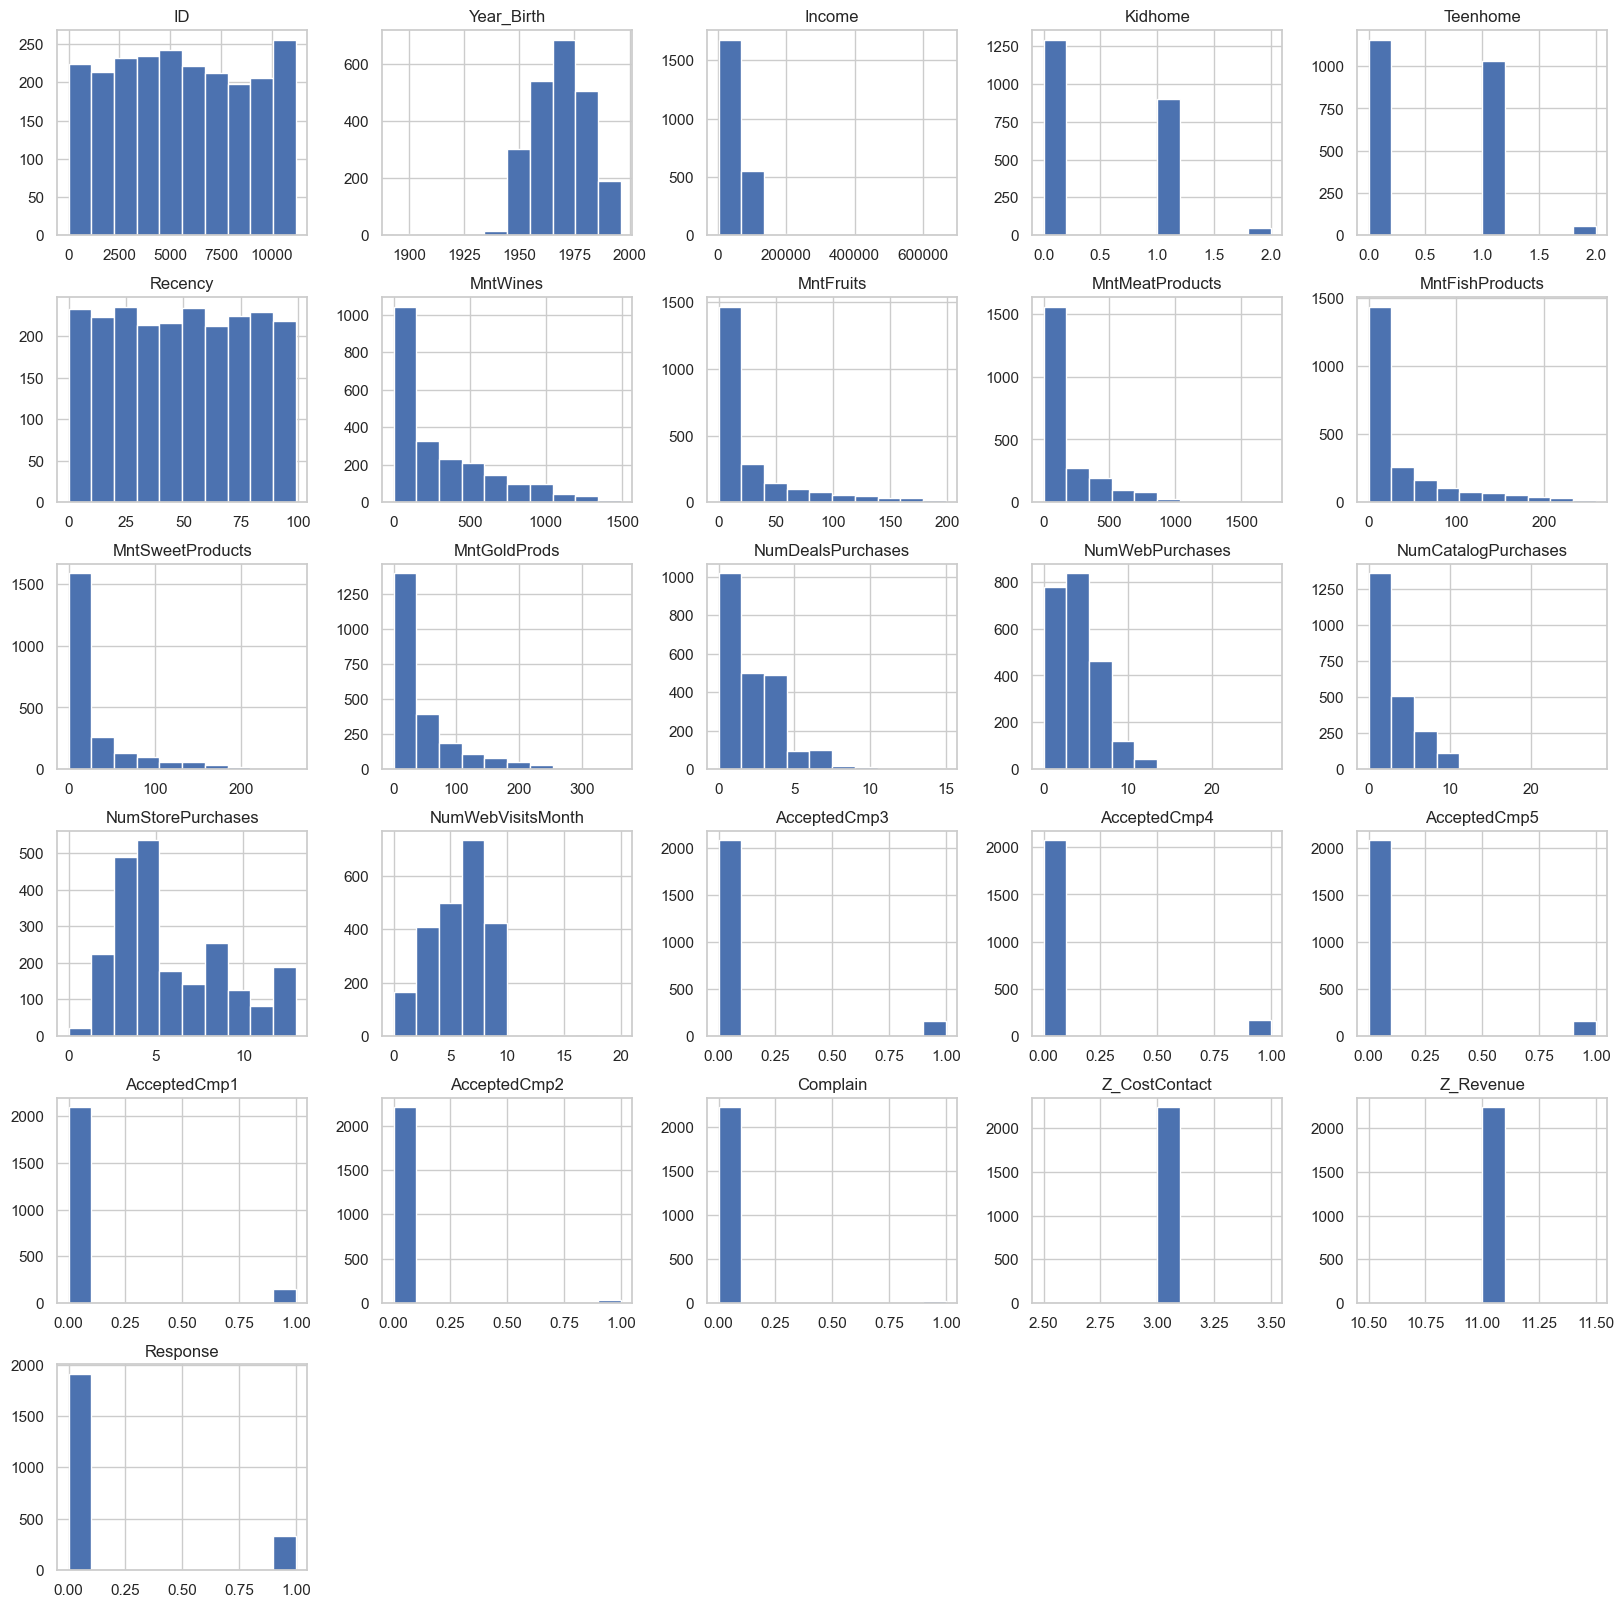

In [787]:
# гистаграммы всех признаков
df.hist(figsize=(20,20))
plt.show()

<div style="padding: 20px; border-radius: 15px; background-color: #e3f2fd; border-left: 8px solid #2196f3; color: #0d47a1; line-height: 1.6;">
<h2 style="margin-top: 0; color: #1565c0;">Комплексный анализ характеристик клиентской базы</h2>

<p>На основе визуализации распределения признаков (Exploratory Data Analysis) можно выделить следующие ключевые инсайты и рекомендации по очистке данных:</p>

<div style="margin-bottom: 15px;">
    <strong>Демография и аномалии:</strong>
    <ul>
        <li><b>Год рождения (Year_Birth):</b> Основная масса клиентов родилась в период с 1950 по 1980 годы. Однако на графике заметны явные <b>аномалии (выбросы)</b> — значения в районе 1900-го года. Маловероятно наличие активных клиентов в возрасте 120+ лет, эти данные требуют корректировки или удаления.</li>
        <li><b>Доход (Income):</b> Наблюдается сильное смещение вправо. Большинство зарабатывает до 100 000, но присутствуют единичные сверхвысокие значения (до 600 000+), которые могут искажать статистические модели.</li>
    </ul>
</div>

<div style="margin-bottom: 15px;">
    <strong>Потребительское поведение (Траты):</strong>
    <ul>
        <li>Все графики трат (MntWines, MntMeatProducts и др.) имеют <b>L-образное распределение</b>. Это говорит о том, что большая часть базы тратит минимальные суммы, в то время как основную выручку генерирует узкий сегмент «премиальных» покупателей.</li>
        <li><b>Вино и Мясо</b> — приоритетные категории с самыми высокими показателями средних трат. Расходы на фрукты, рыбу и сладости значительно скромнее.</li>
    </ul>
</div>

<div style="margin-bottom: 15px;">
    <strong>Каналы продаж и активность:</strong>
    <ul>
        <li><b>Recency (Давность покупки):</b> Распределение близко к равномерному. Это значит, что в базе поровну представлены как «свежие», так и «спящие» клиенты.</li>
        <li><b>Каналы:</b> Покупки в магазинах (NumStorePurchases) и через сайт (NumWebPurchases) происходят чаще, чем через каталоги. При этом веб-визиты (NumWebVisitsMonth) имеют нормальное распределение с пиком в районе 6-8 посещений в месяц.</li>
    </ul>
</div>

<div style="margin-bottom: 15px;">
    <strong>Маркетинговые кампании:</strong>
    <ul>
        <li><b>Эффективность акций:</b> Распределения AcceptedCmp (1-5) показывают крайне низкую конверсию. Подавляющее большинство клиентов не приняло ни одного предложения. Целевая переменная <b>Response</b> также сильно несбалансирована — положительных откликов значительно меньше, чем отказов.</li>
        <li><b>Жалобы (Complain):</b> Уровень недовольства крайне низок, что является позитивным показателем качества сервиса.</li>
    </ul>
</div>
</div>



## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Коряляционная матрица</strong></div>


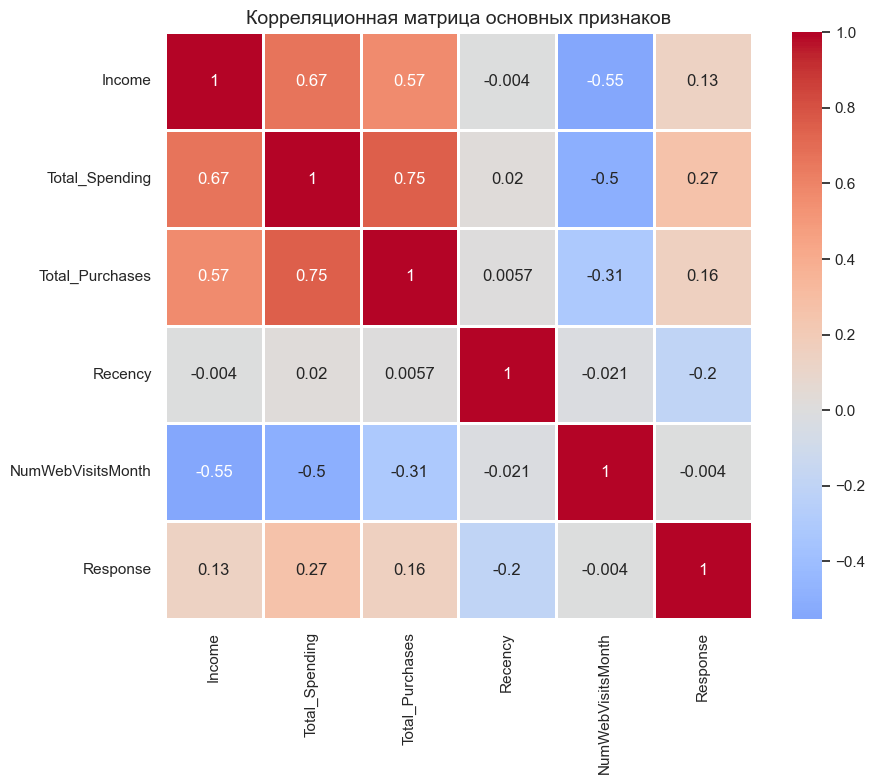

In [788]:
numeric_cols = df_eda.select_dtypes(include=[np.number]).columns
corr_matrix = df_eda[numeric_cols].corr()

# Тепловая карта (только основные признаки)
main_features = ['Income', 'Total_Spending', 
                 'Total_Purchases', 'Recency', 'NumWebVisitsMonth', 
                  'Response']

plt.figure(figsize=(10, 8))
sns.heatmap(df_eda[main_features].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1)
plt.title('Корреляционная матрица основных признаков', fontsize=14)
plt.tight_layout()
plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Ключевые выводы корреляции:</strong>
<ul>
<li><b>Доход и Траты (0.67):</b> Прямая связь — клиенты с высоким заработком приносят основной доход компании.</li>
<li><b>Траты и Покупки (0.75):</b> Самая сильная связь. Общий бюджет напрямую зависит от частоты транзакций (лояльности), а не от разовых дорогих покупок.</li>
<li><b>Доход и Визиты на сайт (-0.55):</b> Интересная обратная связь — обеспеченные клиенты заходят на сайт <b>реже</b>. Вероятно, они тратят время только на целевые покупки или предпочитают офлайн.</li>
<li><b>Давность (Recency) и Отклик (-0.2):</b> Чем дольше клиент ничего не покупал, тем меньше шансов, что он отреагирует на новую рекламу. Активные клиенты («теплые») более лояльны к акциям.</li>
</ul>
<strong>Резюме:</strong> Основной фокус маркетинга должен быть направлен на удержание высокодоходного сегмента и стимуляцию повторных покупок, пока клиент остается активным.
</div>


## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Создаём boxplot-ы</strong></div>


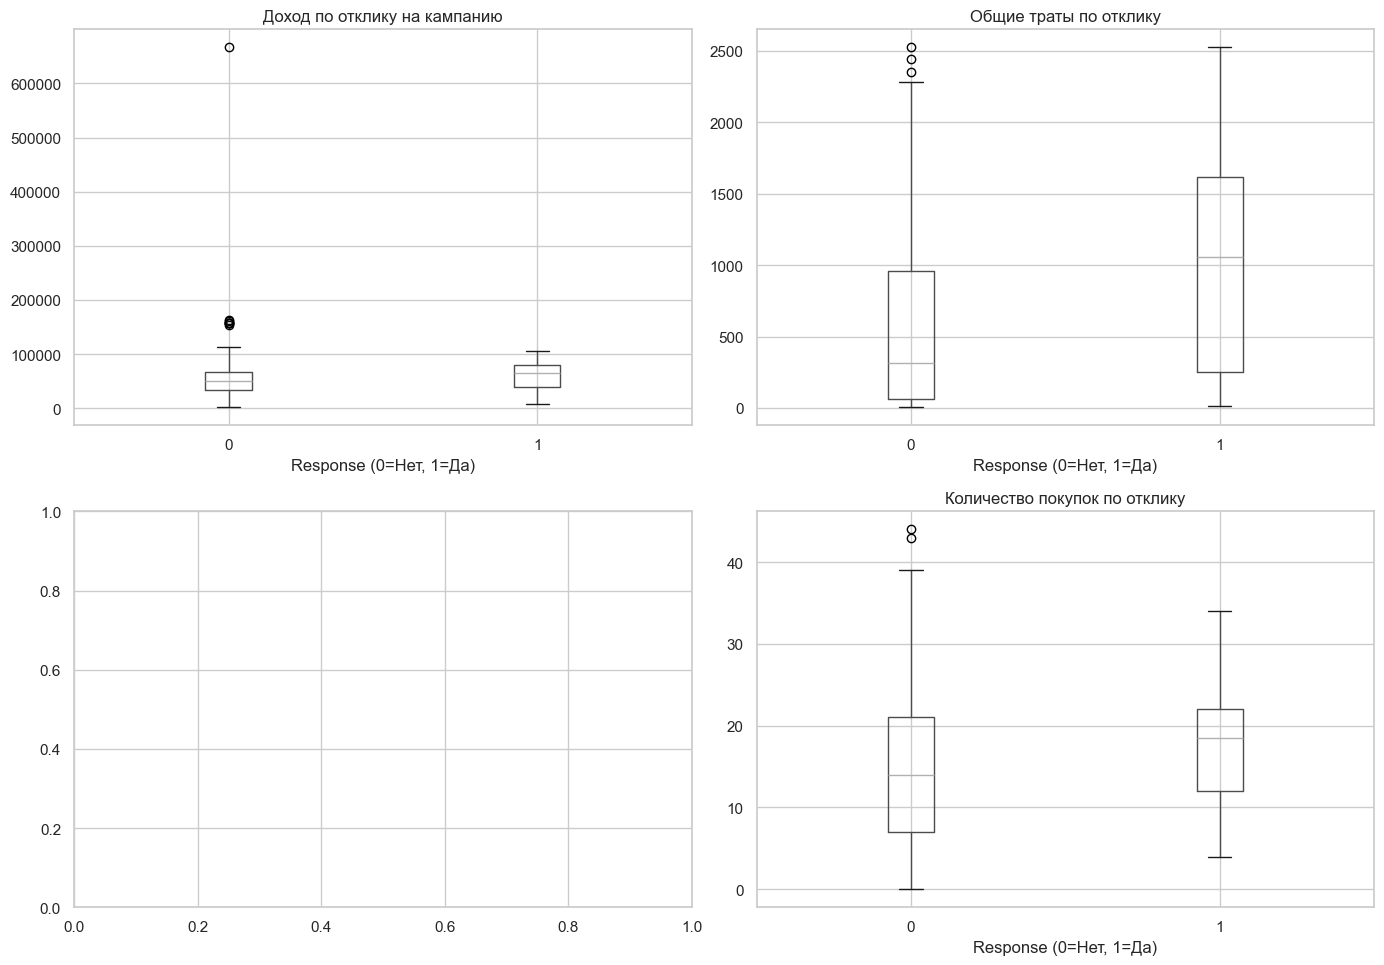

In [789]:
# Сравнение Responders vs Non-responders
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Доход по Response
df_eda.boxplot(column='Income', by='Response', ax=axes[0, 0])
axes[0, 0].set_title('Доход по отклику на кампанию')
axes[0, 0].set_xlabel('Response (0=Нет, 1=Да)')

# Траты по Response
df_eda.boxplot(column='Total_Spending', by='Response', ax=axes[0, 1])
axes[0, 1].set_title('Общие траты по отклику')
axes[0, 1].set_xlabel('Response (0=Нет, 1=Да)')

# Покупки по Response
df_eda.boxplot(column='Total_Purchases', by='Response', ax=axes[1, 1])
axes[1, 1].set_title('Количество покупок по отклику')
axes[1, 1].set_xlabel('Response (0=Нет, 1=Да)')

plt.suptitle('')  # Убираем автоматический заголовок
plt.tight_layout()
plt.show()


<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Анализ:</strong>
<ul>
<li><b>Доход:</b> Откликнувшиеся клиенты (Response=1) имеют более высокий уровень дохода. Медиана смещена вверх по сравнению с теми, кто проигнорировал акцию.</li>
<li><b>Общие траты:</b> Самый значимый показатель. Те, кто ответил на предложение, тратят <b>в 3 раза больше</b> (медиана >1000 против ~300). Кампания лучше всего работает на «премиальном» сегменте.</li>
<li><b>Количество покупок:</b> Лояльные клиенты, совершающие больше транзакций (медиана ~18-19), охотнее принимают предложения, чем менее активные покупатели.</li>
<li><b>Аномалии:</b> В группе отказавшихся (0) виден критический выброс по доходу (600к+), что подтверждает необходимость чистки данных перед моделированием.</li>
</ul>
<strong>Вывод:</strong> Маркетинговые кампании компании наиболее эффективны для группы состоятельных и активных клиентов с высокими общими расходами.
</div>

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Анализ принятия предложений компаний</strong></div>

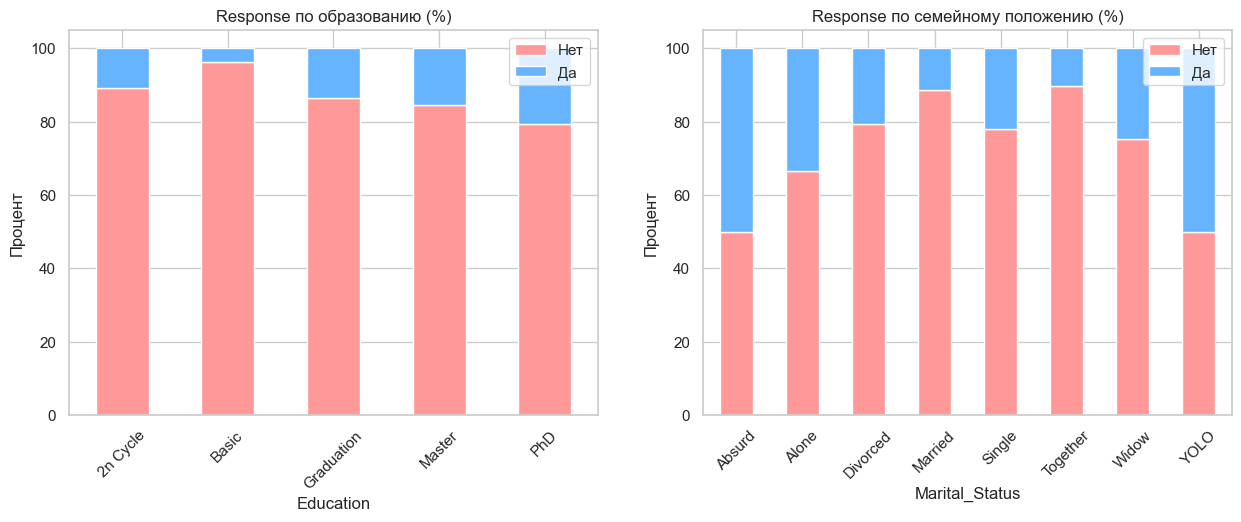

In [790]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Response по образованию
edu_response = pd.crosstab(df_eda['Education'], df_eda['Response'], normalize='index') * 100
edu_response.plot(kind='bar', stacked=True, ax=axes[0], color=['#ff9999', '#66b3ff'])
axes[0].set_title('Response по образованию (%)')
axes[0].set_ylabel('Процент')
axes[0].legend(['Нет', 'Да'])
axes[0].tick_params(axis='x', rotation=45)

# Response по семейному положению
marital_response = pd.crosstab(df_eda['Marital_Status'], df_eda['Response'], normalize='index') * 100
marital_response.plot(kind='bar', stacked=True, ax=axes[1], color=['#ff9999', '#66b3ff'])
axes[1].set_title('Response по семейному положению (%)')
axes[1].set_ylabel('Процент')
axes[1].legend(['Нет', 'Да'])
axes[1].tick_params(axis='x', rotation=45)
plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Влияние демографии на отклик (Response):</strong>
<ul>
<li><b>Образование:</b> Самый высокий процент отклика наблюдается у клиентов с ученой степенью <b>PhD</b>. Клиенты с базовым образованием (Basic) практически не реагируют на кампании. Видна прямая зависимость: чем выше уровень образования, тем выше лояльность к предложениям.</li>
<li><b>Семейное положение:</b> Одинокие клиенты (<b>Single</b>) и вдовы/вдовцы (<b>Widow</b>) откликаются чаще, чем те, кто состоит в отношениях (Married/Together).</li>
<li><b>Аномальные группы:</b> Категории <i>Absurd</i> и <i>YOLO</i> показывают аномально высокий отклик (до 50%), что обусловлено крайне малым количеством людей в этих группах и не должно приниматься за массовый тренд.</li>
</ul>
<strong>Резюме:</strong> Идеальный профиль для таргетинга — образованный клиент (Master/PhD), не состоящий в браке.
</div>

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Графики выбросов</strong></div>

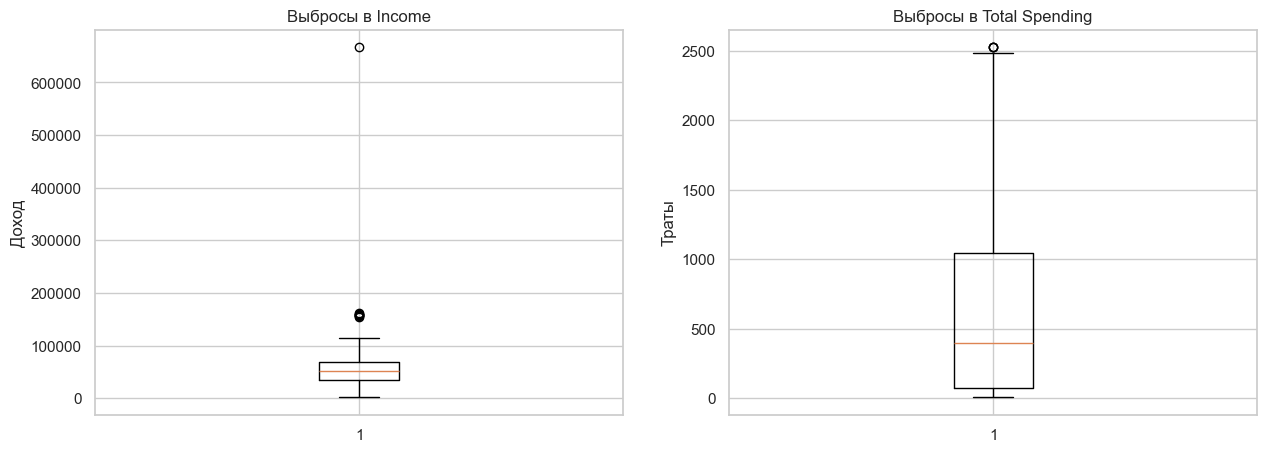

In [791]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot для дохода
axes[0].boxplot(df_eda['Income'].dropna())
axes[0].set_title('Выбросы в Income')
axes[0].set_ylabel('Доход')

# Boxplot для трат
axes[1].boxplot(df_eda['Total_Spending'])
axes[1].set_title('Выбросы в Total Spending')
axes[1].set_ylabel('Траты')
plt.show()

# Количество выбросов по методу IQR
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Анализ аномалий (выбросов):</strong>
<ul>
<li><b>Доход (Income):</b> Обнаружен критический выброс — значение свыше 600 000. Оно в разы превышает средний уровень по выборке и, скорее всего, является технической ошибкой ввода. Такие данные необходимо удалить или скорректировать перед обучением моделей.</li>
<li><b>Общие траты (Total Spending):</b> Здесь также присутствуют выбросы (значения свыше 2500), но они выглядят более естественными. Это сегмент «супер-лояльных» клиентов, которые тратят значительно больше среднего чека.</li>
</ul>
<strong>Рекомендация:</strong> Для повышения точности анализа стоит отсечь экстремальные значения дохода (например, всё, что выше 150 000), чтобы средние показатели не были искажены единичными аномалиями.
</div>

# <div style="padding: 15px; border-radius: 10px; background: rgb(194, 208, 255); border: 1px solid rgba(110, 142, 251, 0.3);border-left: 10px solid #6e8efb; color: #4a148c; font-size: 32px; text-align: center;"><strong>Кластеризация и визуализация кластеров</strong></div>

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Нормализация категорий</strong></div>

In [792]:
df = read_file()

df["Education"] = df["Education"].replace({"2n Cycle": "Pre-Graduate", "Basic": "Pre-Graduate"})
df["Marital_Status"] = df["Marital_Status"].replace({
    "Married": "Married/Together", "Together": "Married/Together",
    "Single": "Single", "Divorced": "Other", "Widow": "Other",
    "Alone": "Other", "Absurd": "Other", "YOLO": "Other"
})

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Feature engineering</strong></div>

In [793]:
df["Kids"] = df["Kidhome"].astype("int8") + df["Teenhome"].astype("int8")
df["Expenses"] = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)
df["TotalAcceptedCmp"] = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].astype("int8").sum(axis=1)
df["TotalNumPurchases"] = df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases"]].sum(axis=1)

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Удаление лишних колонок</strong></div>

In [794]:
df.drop(columns=["Kidhome", "Teenhome", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", 
                "MntSweetProducts", "MntGoldProds", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", 
                "AcceptedCmp4", "AcceptedCmp5", "NumWebPurchases", "NumCatalogPurchases", 
                "NumStorePurchases", "NumDealsPurchases"], inplace=True)

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Замена колонок</strong></div>

In [795]:
df["Kids"] = df["Kids"].replace({0: "No Kid", 1: "Has Kids", 2: "Has Kids", 3: "Has Kids"})
df["TotalAcceptedCmp"] = df["TotalAcceptedCmp"].replace({0: "0", 1: ">0", 2: ">0", 3: ">0", 4: ">0"})

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Создание дополнительных таблиц</strong></div>

In [796]:
num_features = ["Income", "Recency", "NumWebVisitsMonth", "Expenses", "TotalNumPurchases"]
cat_features = ["Education", "Marital_Status", "Response", "Complain", "Kids", "TotalAcceptedCmp"]

feature_cols = num_features + cat_features 

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Очистка Income</strong></div>

In [797]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df = df[df['Income'] < 600000]

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Создаём предобработчик данных</strong></div>

In [798]:
n_clusters = 4

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Основной Pipeline с KMeans</strong></div>

In [799]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)), 
    ('cluster', KMeans(n_clusters=n_clusters, random_state=42, n_init=10))
])

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Обучаем KMeans</strong></div>


In [800]:
df['Cluster_KM'] = pipeline.fit_predict(df)

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>ВАЖНО: Извлекаем подготовленные данные для обучения других моделей</strong></div>

In [801]:
X_processed = pipeline.named_steps['preprocessor'].transform(df)
X_pca = pipeline.named_steps['pca'].transform(X_processed)

##  <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>МОДЕЛЬ 2: Agglomerative Clustering</strong></div>

In [802]:
agg = AgglomerativeClustering(n_clusters=n_clusters)
df['Cluster_Agg'] = agg.fit_predict(X_processed)

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>МОДЕЛЬ 3: Gaussian Mixture Model (GMM)</strong></div>

In [803]:
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X_processed)

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Ставим оценку по Коэффициенту силуэта, по тому как 1 кластер похож на рядом стоящие</strong></div>

Silhouette Score (KMeans): 0.143
Silhouette Score (Agglomerative): 0.130
Silhouette Score (GMM): 0.071


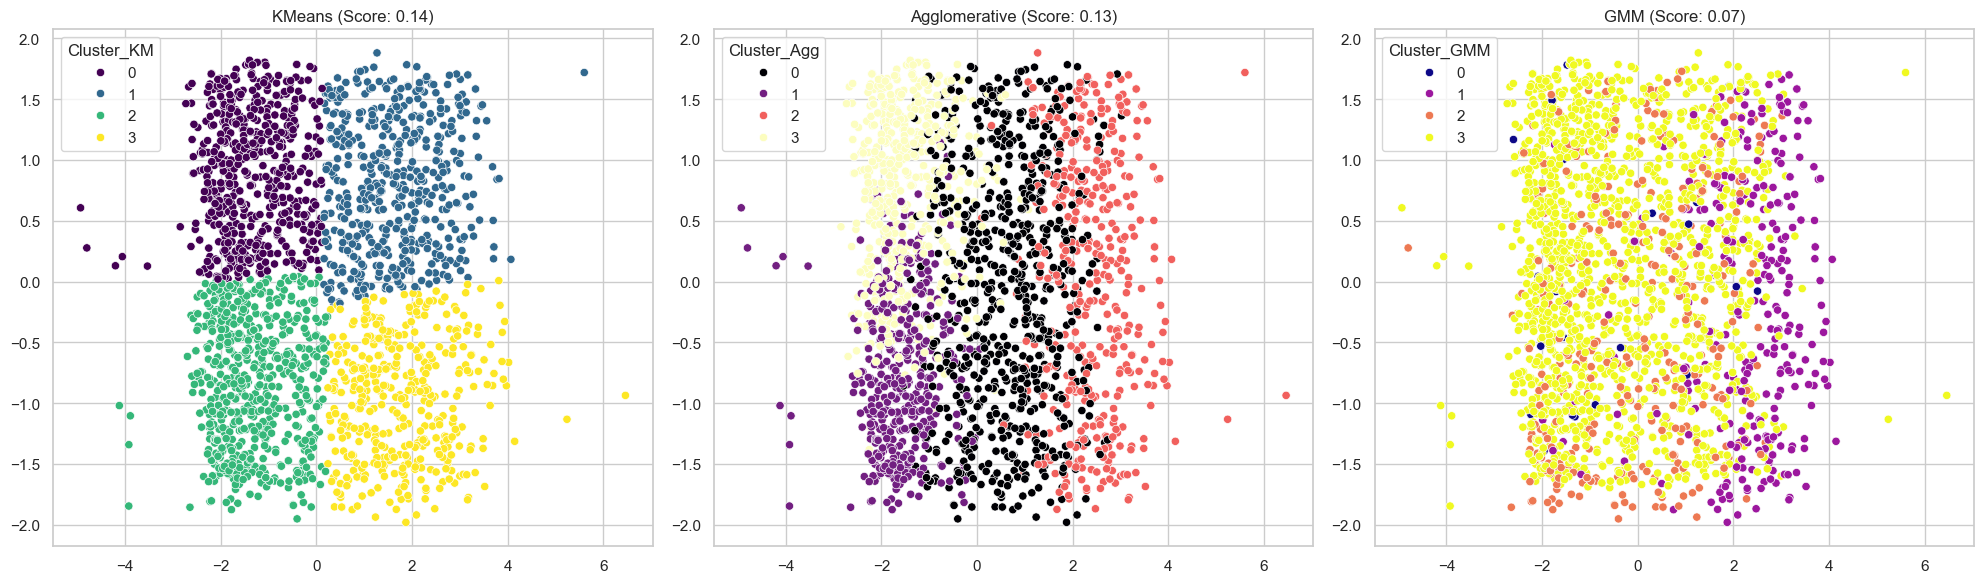

In [804]:
# Расчет Silhouette Score
score_km = silhouette_score(X_processed, df['Cluster_KM'])
score_agg = silhouette_score(X_processed, df['Cluster_Agg'])
score_gmm = silhouette_score(X_processed, df['Cluster_GMM'])

print(f"Silhouette Score (KMeans): {score_km:.3f}")
print(f"Silhouette Score (Agglomerative): {score_agg:.3f}")
print(f"Silhouette Score (GMM): {score_gmm:.3f}")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster_KM'], palette='viridis', ax=axes[0])
axes[0].set_title(f'KMeans (Score: {score_km:.2f})')

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster_Agg'], palette='magma', ax=axes[1])
axes[1].set_title(f'Agglomerative (Score: {score_agg:.2f})')

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster_GMM'], palette='plasma', ax=axes[2])
axes[2].set_title(f'GMM (Score: {score_gmm:.2f})')

plt.tight_layout()
plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Сравнение моделей кластеризации:</strong>
<ul>
<li><b>Лидер — KMeans (0.14):</b> Этот алгоритм показал наилучший результат Silhouette Score. Визуально он разделил данные на четыре четких квадранта, что удобно для базовой сегментации.</li>
<li><b>Agglomerative (0.13):</b> Иерархическая кластеризация дала схожий результат, но разделила данные «полосами». Это может указывать на то, что модель больше опирается на один доминирующий признак.</li>
<li><b>Аутсайдер — GMM (0.07):</b> Модель смесей Гаусса показала худший результат. На графике видно сильное перекрытие кластеров — модель «запуталась» в плотности данных, превратив сегментацию в шум.</li>
<li><b>Общая оценка:</b> Низкие значения Silhouette Score (близкие к 0) говорят о том, что данные в пространстве признаков не образуют идеально разделенных групп и сильно перемешаны.</li>
</ul>
<strong>Итог:</strong> Для дальнейшей работы и описания профилей клиентов рекомендуется использовать <b>KMeans</b>, так как он обеспечивает наиболее понятную и математически обоснованную структуру сегментов.
</div>

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Средние показатели для кластеров GMM</strong></div>


In [805]:
display(df.groupby('Cluster_GMM')[num_features].mean())

,Income,Recency,NumWebVisitsMonth,Expenses,TotalNumPurchases
Cluster_GMM,,,,,
0,42546.478261,50.086957,6.043478,352.173913,12.826087
1,75958.038851,46.260135,3.108108,1466.935811,19.817568
2,50153.595975,43.241486,6.653251,613.229102,16.390093
3,48017.932999,50.826550,5.444584,448.678773,13.666249


<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Профили сегментов (на основе GMM):</strong>
<ul>
<li><b>Кластер 1 («VIP»):</b> Самая прибыльная группа. Имеют самый высокий доход (~76к) и тратят в 3-4 раза больше остальных (~1467). При этом они реже всего посещают сайт (~3 визита), предпочитая быстрые или прямые покупки.</li>
<li><b>Кластер 2 («Активные исследователи»):</b> Клиенты со средним доходом. У них <b>максимальное число визитов на сайт (~6.6)</b> и неплохой уровень покупок. Это аудитория, которая долго выбирает товары онлайн перед покупкой.</li>
<li><b>Кластеры 0 и 3 («Эконом-сегмент»):</b> Группы с наиболее низким доходом (~42к-48к) и минимальными тратами. Они часто заходят на сайт, но совершают мало покупок. Разница между ними лишь в чуть большей активности Кластера 3.</li>
</ul>
<strong>Бизнес-инсайт:</strong> Основные маркетинговые усилия по удержанию должны быть направлены на <b>Кластер 1</b>. Для <b>Кластера 2</b> эффективными будут онлайн-рассылки и персонализированные предложения на сайте, чтобы конвертировать их высокую активность в еще большие продажи.
</div>

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Выбираем ключевые метрики для анализа</strong></div>

In [806]:
analysis_features = ['Income', 'Expenses', 'TotalNumPurchases', 'Recency', 'NumWebVisitsMonth']

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Считаем средние</strong></div>

In [807]:
cluster_stats = df.groupby('Cluster_GMM')[analysis_features].mean()

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Добавляем размер кластера (сколько там людей)</strong></div>


In [808]:
cluster_stats['Count'] = df.groupby('Cluster_GMM').size()

display(cluster_stats)

,Income,Expenses,TotalNumPurchases,Recency,NumWebVisitsMonth,Count
Cluster_GMM,,,,,,
0,42546.478261,352.173913,12.826087,50.086957,6.043478,23
1,75958.038851,1466.935811,19.817568,46.260135,3.108108,296
2,50153.595975,613.229102,16.390093,43.241486,6.653251,323
3,48017.932999,448.678773,13.666249,50.826550,5.444584,1597


## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>График Распределение образования по кластерам</strong></div>

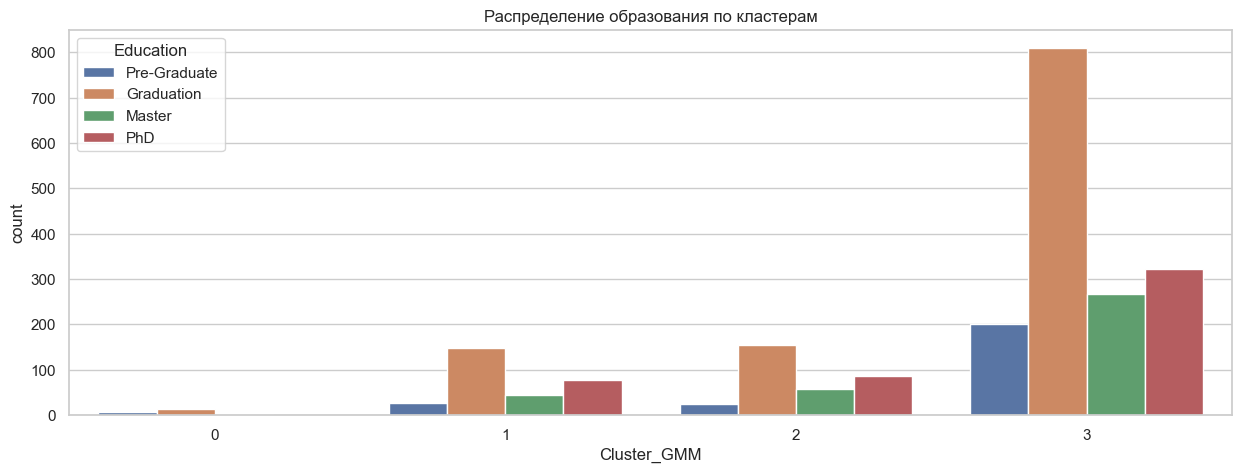

In [809]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Cluster_GMM', hue='Education', data=df)
plt.title('Распределение образования по кластерам')
plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Образовательный профиль кластеров:</strong>
<ul>
<li><b>Доминирование высшего образования:</b> Категория <b>Graduation</b> является преобладающей во всех активных сегментах (1, 2 и 3). Это подтверждает, что основной клиент компании — человек с законченным высшим образованием.</li>
<li><b>Кластер 3 — Масс-маркет:</b> Самый многочисленный сегмент, который вобрал в себя основную массу клиентов всех уровней образования. Здесь же сосредоточено наибольшее количество «Pre-Graduate» (студентов).</li>
<li><b>Интеллектуальное ядро (1 и 2):</b> В кластерах с более высокими тратами и доходами (как мы видели ранее) сохраняется высокая доля специалистов со степенями <b>PhD</b> и <b>Master</b>.</li>
<li><b>Кластер 0:</b> Практически не представлен в данном разрезе из-за крайне малого количества попавших в него наблюдений.</li>
</ul>
<strong>Итог:</strong> Образовательный уровень распределен между кластерами довольно равномерно. Это означает, что образование само по себе не является главным разделителем для этой модели кластеризации — ключевыми факторами остаются <b>доход и потребительская активность</b>.
</div>

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>График Наличие детей по кластерам</strong></div>

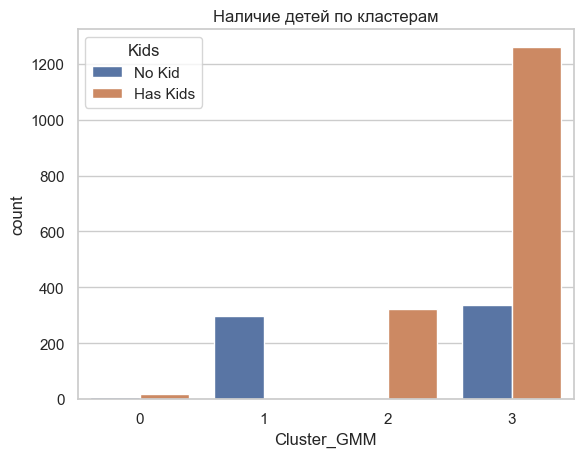

In [810]:
sns.countplot(x='Cluster_GMM', hue='Kids', data=df)
plt.title('Наличие детей по кластерам')
plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Влияние наличия детей на сегментацию:</strong>
<ul>
<li><b>Кластер 1 (VIP):</b> Практически полностью состоит из клиентов <b>без детей (No Kid)</b>. Это объясняет их высокий уровень свободных средств и готовность тратить большие суммы на вино и премиальные товары.</li>
<li><b>Кластер 2:</b> Напротив, целиком состоит из клиентов <b>с детьми (Has Kids)</b>. Помня прошлый график, именно этот сегмент активнее всего посещает сайт, вероятно, находясь в поиске выгодных предложений для семьи.</li>
<li><b>Кластер 3 (Масс-маркет):</b> Самый масштабный сегмент, в котором подавляющее большинство клиентов — семьи с детьми.</li>
</ul>
<strong>Бизнес-инсайт:</strong> Наличие детей является одним из <b>ключевых факторов</b> разделения аудитории. Клиенты без детей тратят больше и ценят качество, в то время как семьи с детьми демонстрируют высокую онлайн-активность, но более сдержанные расходы.
</div>

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>График Разброс доходов по кластерам</strong></div>

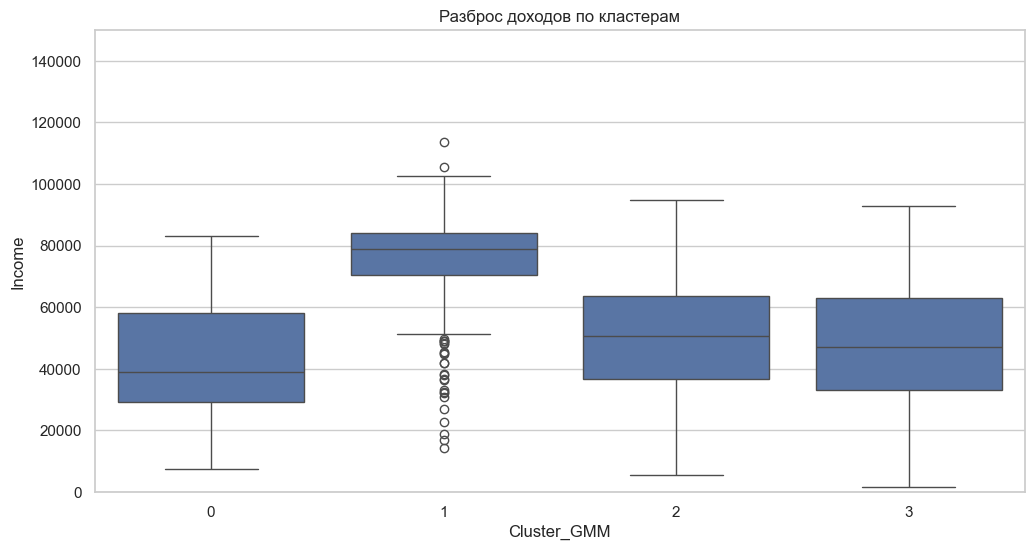

In [811]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster_GMM', y='Income', data=df)
plt.title('Разброс доходов по кластерам')
plt.ylim(0, 150000) # Ограничим, чтобы выбросы не мешали
plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Анализ доходов по кластерам:</strong>
<ul>
<li><b>Кластер 1 (Премиум):</b> Обладает самым высоким уровнем дохода с медианой около 80 000. Наличие большого количества нижних выбросов говорит о том, что в этот кластер попали и люди с доходом ниже среднего, которые ведут себя как "VIP", совершая дорогие покупки.</li>
<li><b>Кластеры 2 и 3 (Масс-маркет):</b> Имеют схожие распределения доходов в диапазоне 40 000–60 000. Это стабильный средний класс, составляющий основу клиентской базы.</li>
<li><b>Кластер 0:</b> Показывает самый низкий медианный доход, подтверждая свою роль наиболее экономного сегмента.</li>
</ul>
<strong>Вывод:</strong> Хотя доход четко выделяет "премиальный" первый кластер, границы между остальными группами по этому признаку размыты. Это подтверждает, что для сегментации важнее <b>поведение клиента (траты)</b>, чем просто уровень его заработка.
</div>

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Графики Разброс доходов и общих расходов по кластерам</strong></div>

C:\Users\yaeKi\AppData\Local\Temp\ipykernel_11360\4283167116.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_GMM', y='Income', data=df, palette='viridis')
C:\Users\yaeKi\AppData\Local\Temp\ipykernel_11360\4283167116.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_GMM', y='Expenses', data=df, palette='viridis')


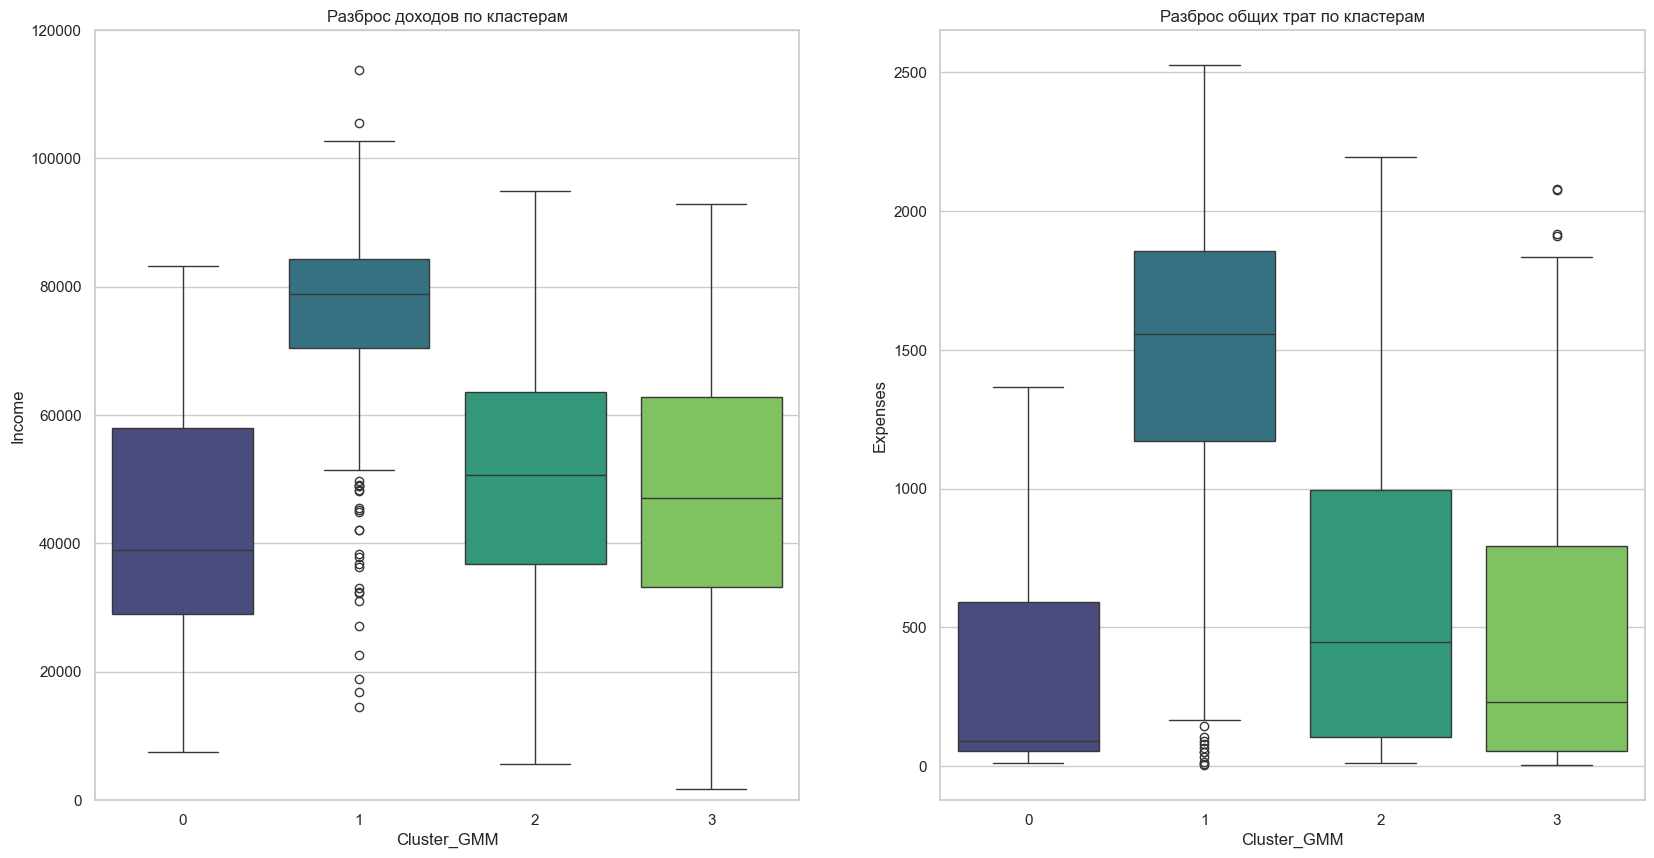

In [812]:
plt.figure(figsize=(20, 10))

# График Доходов
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster_GMM', y='Income', data=df, palette='viridis')
plt.title('Разброс доходов по кластерам')
plt.ylim(0, 120000) # убираем аномальные выбросы для наглядности

# График Трат
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster_GMM', y='Expenses', data=df, palette='viridis')
plt.title('Разброс общих трат по кластерам')

plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Сравнение финансовых профилей сегментов:</strong>
<ul>
<li><b>Кластер 1 (VIP-сегмент):</b> Безусловный лидер. Высокий уровень дохода напрямую конвертируется в самые высокие траты. Это наиболее ценная и стабильная группа для бизнеса.</li>
<li><b>Кластер 2 (Средний сегмент):</b> При доходах, сопоставимых с кластером 3, эти клиенты тратят значительно больше. Это говорит о их высокой лояльности и вовлеченности в покупки.</li>
<li><b>Кластер 3 (Бюджетный сегмент):</b> Несмотря на наличие клиентов с доходом выше среднего, общие траты здесь остаются низкими. Группа характеризуется осторожным потреблением.</li>
<li><b>Кластер 0 (Эконом):</b> Минимум по обоим показателям. Самый малочисленный и наименее активный сегмент в плане выручки.</li>
</ul>
<strong>Ключевой вывод:</strong> График трат разделяет кластеры гораздо четче, чем график доходов. Это подтверждает, что <b>фактическое поведение (траты)</b> является более надежным критерием для сегментации, чем потенциальные возможности клиента (доход).
</div>

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Графики Образование и наличие детей по кластерам</strong></div>

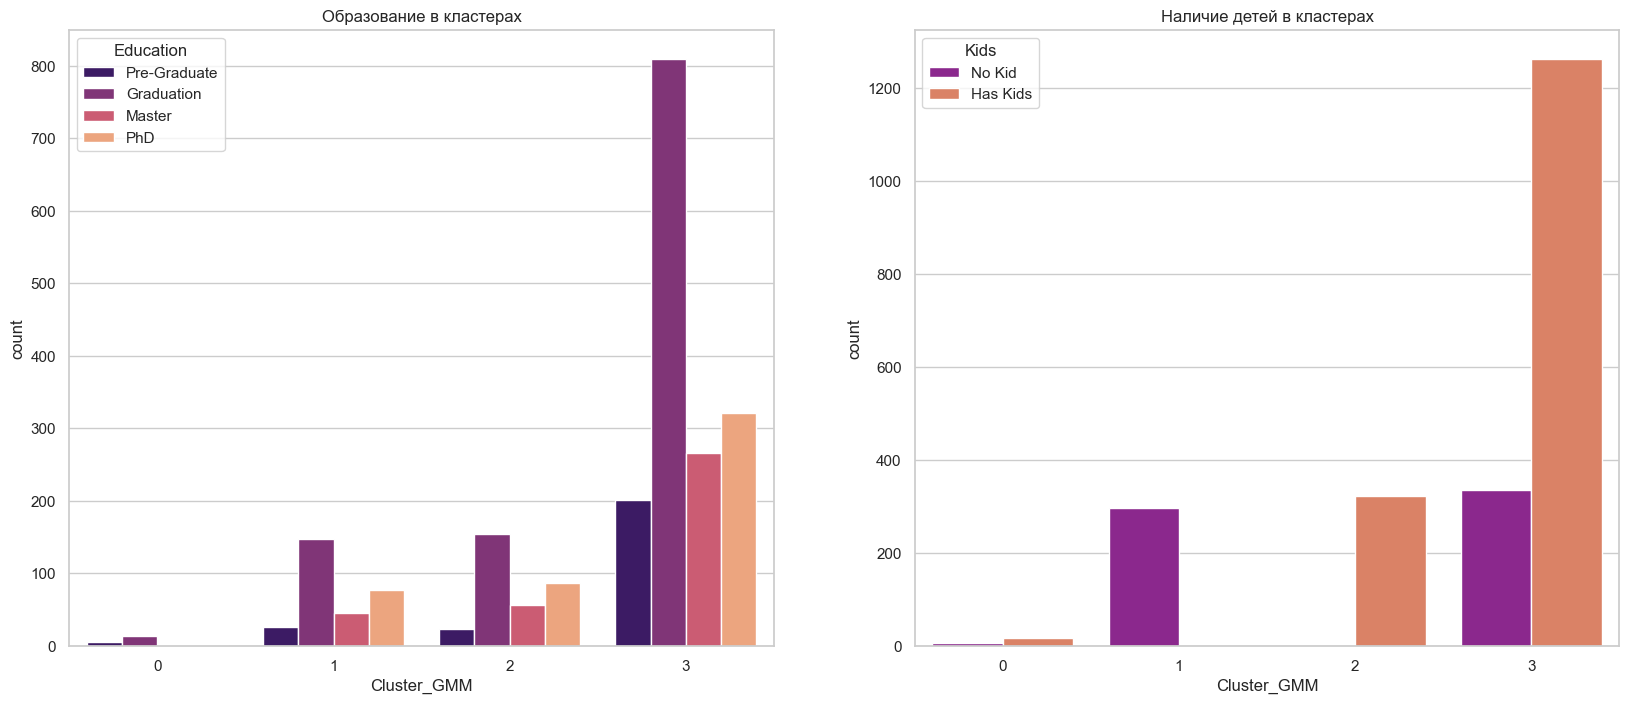

In [813]:
plt.figure(figsize=(20, 8))

# Распределение образования
plt.subplot(1, 2, 1)
sns.countplot(x='Cluster_GMM', hue='Education', data=df, palette='magma')
plt.title('Образование в кластерах')

# Распределение наличия детей
plt.subplot(1, 2, 2)
sns.countplot(x='Cluster_GMM', hue='Kids', data=df, palette='plasma')
plt.title('Наличие детей в кластерах')

plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Социальный профиль сегментов:</strong>
<ul>
<li><b>Образование (общий тренд):</b> Во всех активных кластерах преобладают люди с высшим образованием (Graduation). Высокий уровень образования является общим признаком всей базы и не является разделяющим фактором.</li>
<li><b>Кластер 1 (Свободные и обеспеченные):</b> Практически на 100% состоит из клиентов <b>без детей</b>. В сочетании с высоким доходом это делает их идеальной аудиторией для премиальных товаров (вино, деликатесы).</li>
<li><b>Кластер 2 и 3 (Семейный сегмент):</b> Эти группы почти полностью состоят из клиентов <b>с детьми</b>. При этом кластер 2 — это более обеспеченные семьи, а кластер 3 — самый массовый сегмент с умеренными тратами.</li>
<li><b>Кластер 0:</b> Малочисленная группа, не имеющая ярко выраженной специфики в данных разрезах.</li>
</ul>
<strong>Резюме:</strong> Наличие детей — <b>ключевой водораздел</b>. Отсутствие детей в первом кластере напрямую коррелирует с их способностью тратить значительно больше на категорию "Luxe", в то время как семьи (2 и 3 кластеры) формируют основной объем транзакций, но с меньшим чеком.
</div>

# <div style="padding: 15px; border-radius: 10px; background: rgb(194, 208, 255); border: 1px solid rgba(110, 142, 251, 0.3);border-left: 10px solid #6e8efb; color: #4a148c; font-size: 32px; text-align: center;"><strong>Классификация: Предугадывание отклика клиента</strong></div>

In [814]:
# 1. Определяем списки признаков (БЕЗ Response)
num_features = ["Income", "Recency", "NumWebVisitsMonth", "Expenses", "TotalNumPurchases"]
cat_features = ["Education", "Marital_Status", "Complain", "Kids", "TotalAcceptedCmp"]

feature_cols = num_features + cat_features

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Создаем матрицу признаков и целевую переменную</strong></div>

In [815]:
# X содержит только признаки, y - только ответ
X = df[feature_cols].copy()
y = df['Response'].copy()

In [816]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Применяем препроцессор
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Получаем имена признаков для визуализации важности
all_feature_names = preprocessor.get_feature_names_out()

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>МЕТОД 1: ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ</strong></div>

In [817]:
log_reg_params = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': ['balanced']
}

log_reg_grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42), 
    log_reg_params, cv=5, scoring='f1', n_jobs=-1
)
log_reg_grid.fit(X_train_processed, y_train)

best_log_reg = log_reg_grid.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test_processed)
y_pred_proba_log_reg = best_log_reg.predict_proba(X_test_processed)[:, 1]

log_reg_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1-Score': f1_score(y_test, y_pred_log_reg),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_log_reg)
}

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>МЕТОД 2: RANDOM FOREST</strong></div>

In [818]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'class_weight': ['balanced']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train_processed, y_train)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_processed)
y_pred_proba_rf = best_rf.predict_proba(X_test_processed)[:, 1]

rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_rf)
}

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>МЕТОД 3: GRADIENT BOOSTING</strong></div>

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Лучшие параметры для Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

МЕТРИКИ GRADIENT BOOSTING
Accuracy: 0.8857
Precision: 0.7778
Recall: 0.3333
F1-Score: 0.4667
ROC-AUC: 0.8876


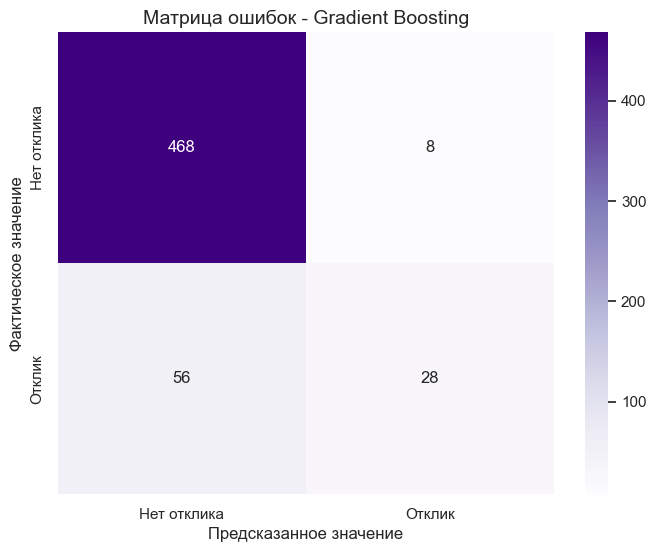

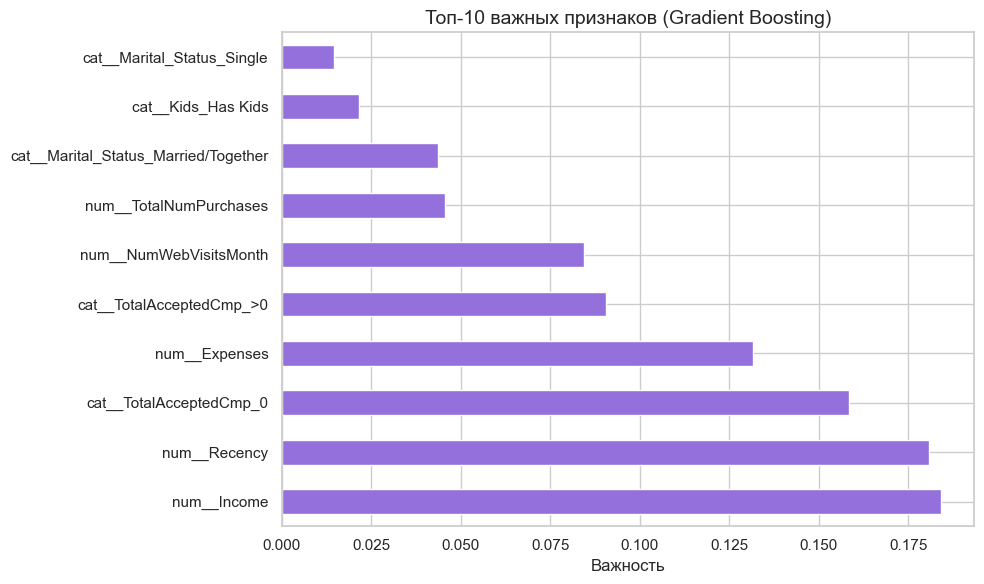

In [819]:
# ==========================================================================
# ==========================================================================

# 1. Параметры для поиска (Grid Search)
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# 2. Инициализация и поиск лучших параметров
gb = GradientBoostingClassifier(random_state=42)

gb_grid = GridSearchCV(
    gb, 
    gb_params, 
    cv=StratifiedKFold(5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

gb_grid.fit(X_train_processed, y_train)

print("\nЛучшие параметры для Gradient Boosting:")
print(gb_grid.best_params_)

# 3. Получение лучшей модели и предсказаний
best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test_processed)
y_pred_proba_gb = best_gb.predict_proba(X_test_processed)[:, 1]

# 4. Расчет метрик
gb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb, zero_division=0),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1-Score': f1_score(y_test, y_pred_gb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_gb)
}

print("\n" + "="*60)
print("МЕТРИКИ GRADIENT BOOSTING")
print("="*60)
for metric, value in gb_metrics.items():
    print(f"{metric}: {value:.4f}")

# 5. Визуализация: Матрица ошибок
plt.figure(figsize=(8, 6))
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Нет отклика', 'Отклик'],
            yticklabels=['Нет отклика', 'Отклик'])
plt.title('Матрица ошибок - Gradient Boosting', fontsize=14)
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.show()

# 6. Важность признаков для Gradient Boosting
feat_importances_gb = pd.Series(best_gb.feature_importances_, index=all_feature_names)
plt.figure(figsize=(10, 6))
feat_importances_gb.nlargest(10).plot(kind='barh', color='mediumpurple')
plt.title('Топ-10 важных признаков (Gradient Boosting)', fontsize=14)
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Сравнение моделей</strong></div>

ИТОГОВЫЕ МЕТРИКИ МОДЕЛЕЙ:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.8054,0.4233,0.8214,0.5587,0.8930
Random Forest,0.8929,0.7400,0.4405,0.5522,0.8774
Gradient Boosting,0.8857,0.7778,0.3333,0.4667,0.8876


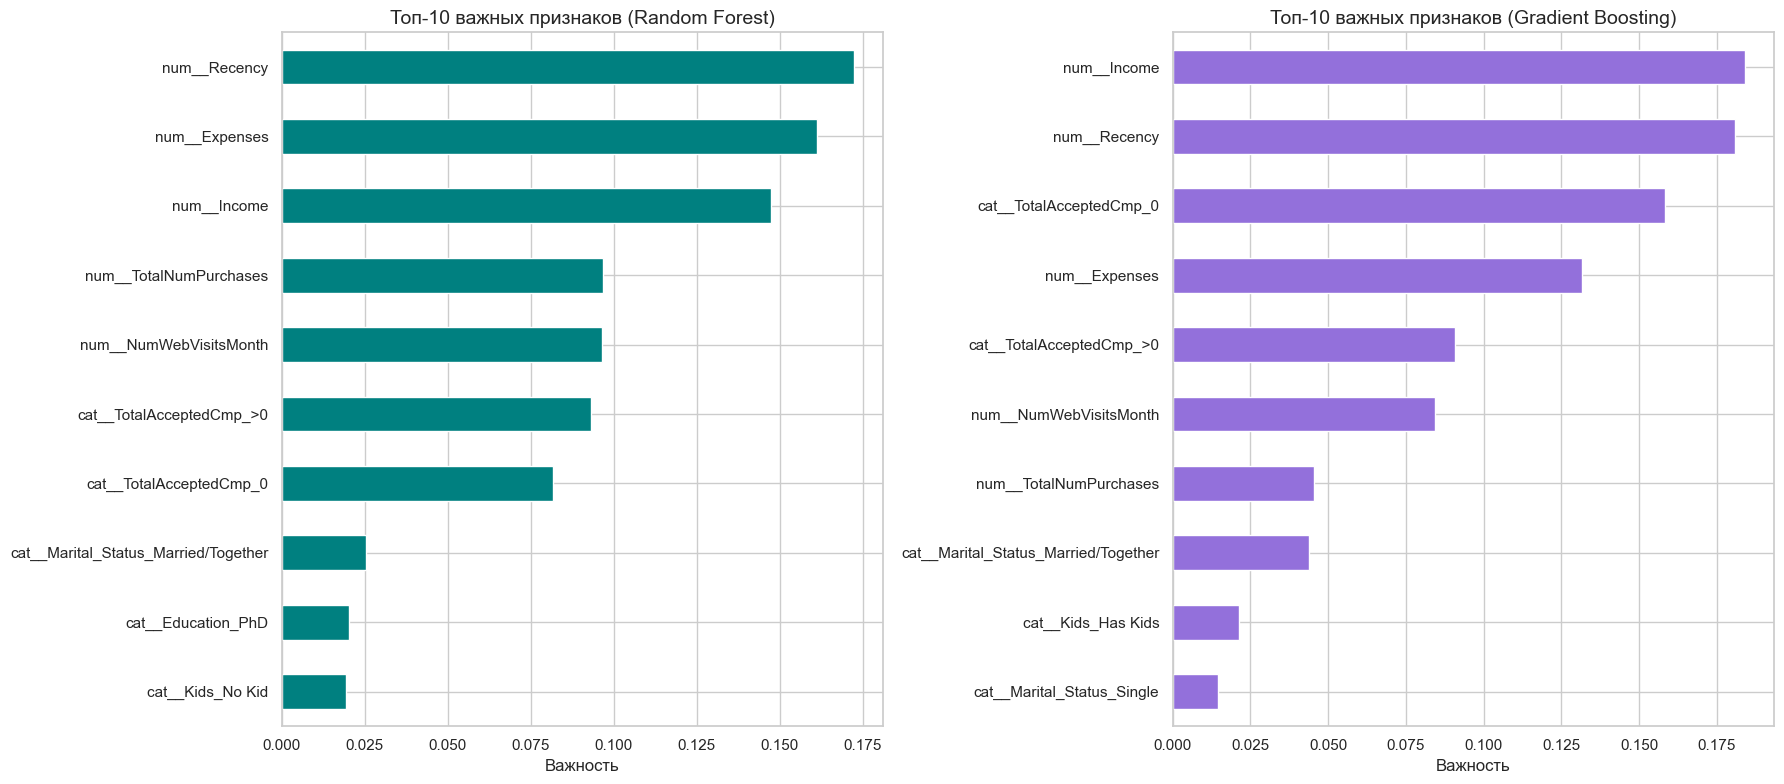

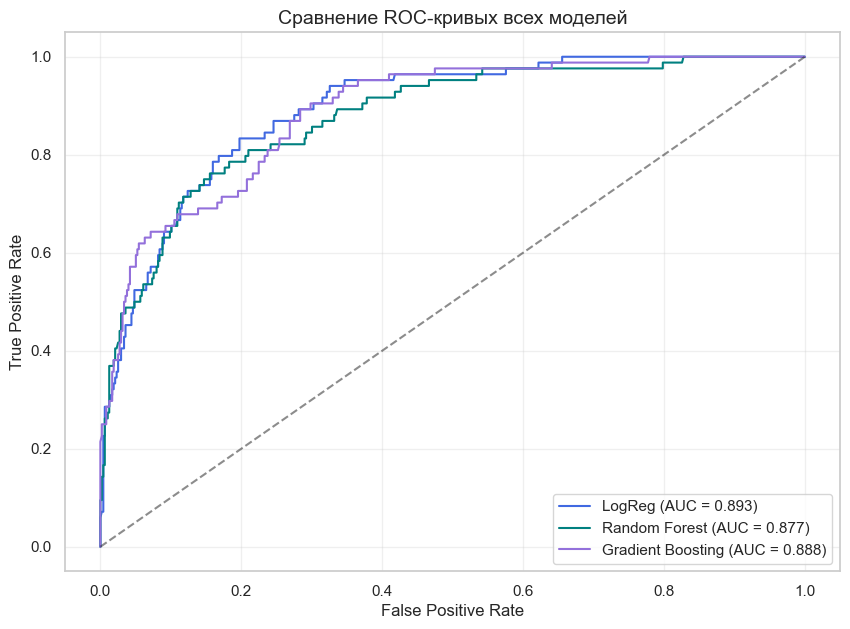

In [ ]:
# 1. Создаем общую таблицу метрик
comparison_df = pd.DataFrame({
    'Logistic Regression': log_reg_metrics,
    'Random Forest': rf_metrics,
    'Gradient Boosting': gb_metrics
}).T

print("ИТОГОВЫЕ МЕТРИКИ МОДЕЛЕЙ:")
display(comparison_df.round(4))

# 2. Визуализация важности признаков для RF и GB (сравнение)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# График для Random Forest
feat_importances_rf = pd.Series(best_rf.feature_importances_, index=all_feature_names)
feat_importances_rf.nlargest(10).sort_values(ascending=True).plot(kind='barh', color='teal', ax=ax1)
ax1.set_title('Топ-10 важных признаков (Random Forest)', fontsize=14)
ax1.set_xlabel('Важность')

# График для Gradient Boosting
feat_importances_gb = pd.Series(best_gb.feature_importances_, index=all_feature_names)
feat_importances_gb.nlargest(10).sort_values(ascending=True).plot(kind='barh', color='mediumpurple', ax=ax2)
ax2.set_title('Топ-10 важных признаков (Gradient Boosting)', fontsize=14)
ax2.set_xlabel('Важность')

plt.tight_layout()
plt.show()

# 3. Общий график ROC-кривых для всех трех моделей
plt.figure(figsize=(10, 7))

# Логистическая регрессия
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr_log, tpr_log, label=f'LogReg (AUC = {log_reg_metrics["ROC-AUC"]:.3f})', color='royalblue')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_metrics["ROC-AUC"]:.3f})', color='teal')

# Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_metrics["ROC-AUC"]:.3f})', color='mediumpurple')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Сравнение ROC-кривых всех моделей', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
<strong>Оценка моделей и ключевые факторы успеха:</strong>
<ul>
<li><b>Качество моделей:</b> Все три модели показали отличные результаты (AUC ~0.88-0.89). Лидером по метрике AUC неожиданно стала <b>Логистическая регрессия (0.893)</b>, что говорит о наличии четких линейных зависимостей в данных.</li>
<li><b>Топ-факторы отклика:</b> Наибольшее влияние на предсказание отклика оказывают <b>Recency</b> (давность покупки), <b>Income</b> (доход) и <b>Expenses</b> (общие траты). Поведение клиента и его благосостояние — главные индикаторы готовности купить.</li>
<li><b>Маркетинговая история:</b> Признак <i>TotalAcceptedCmp</i> также вошел в топ важности. Это значит, что предыдущий опыт участия в акциях является сильным предиктором будущего согласия.</li>
<li><b>Демография:</b> Наличие детей, образование и семейное положение имеют <b>минимальный вес</b> для предсказания. Для бизнеса это сигнал: важнее то, как клиент тратит деньги сейчас, а не его формальный социальный статус.</li>
</ul>
<strong>Итог:</strong> Модели готовы к использованию. Для повышения конверсии следующей кампании стоит таргетироваться на "свежих" (низкий Recency) и состоятельных клиентов, которые уже проявляли интерес к акциям ранее.
</div>

In [ ]:
# 1. Выбор модели и данных
chosen_model = best_gb 
sample_indices = np.random.choice(len(X_test), 5, replace=False)

sample_data = X_test.iloc[sample_indices]
sample_true = y_test.iloc[sample_indices]
sample_processed = X_test_processed[sample_indices]

sample_pred = chosen_model.predict(sample_processed)
sample_proba = chosen_model.predict_proba(sample_processed)

# 2. Генерация HTML
cards_html = f"""
<div style="font-family: sans-serif;">
    <h3 style="color: #333; margin-bottom: 20px;"> Проверка предсказаний модели: <span style="color: #6e8efb;">{chosen_model.__class__.__name__}</span></h3>
    <div style="display: flex; flex-wrap: wrap; gap: 15px;">
"""

for i in range(len(sample_indices)):
    row = sample_data.iloc[i]
    is_correct = sample_true.iloc[i] == sample_pred[i]
    border_color = "#4caf50" if is_correct else "#f44336" 
    bg_color = "#e8f5e9" if is_correct else "#ffebee"
    
    fact_text = "ОТКЛИК" if sample_true.iloc[i] == 1 else "НЕТ ОТКЛИКА"
    pred_text = "ОТКЛИК" if sample_pred[i] == 1 else "НЕТ ОТКЛИКА"
    prob_percent = sample_proba[i][1] * 100

    cards_html += f"""
    <div style="flex: 1; min-width: 250px; border: 2px solid {border_color}; border-radius: 10px; padding: 15px; background-color: {bg_color}; box-shadow: 2px 2px 10px rgba(0,0,0,0.1);">
        <div style="font-weight: bold; font-size: 14px; margin-bottom: 10px; color: #555;">ОБРАЗЕЦ #{i+1}</div>
        
        <div style="font-size: 13px; margin-bottom: 10px; line-height: 1.5;">
            <b>Доход:</b> {row['Income']:,.0f} <br>
            <b>Траты:</b> {row['Expenses']:,.0f} <br>
            <b>Кампании:</b> {row['TotalAcceptedCmp']}
        </div>
        
        <div style="margin-top: 10px; padding-top: 10px; border-top: 1px solid rgba(0,0,0,0.1);">
            <div style="display: flex; justify-content: space-between; font-size: 12px;">
                <span>ФАКТ:</span> <b>{fact_text}</b>
            </div>
            <div style="display: flex; justify-content: space-between; font-size: 12px; margin-top: 5px;">
                <span>ПРЕДСКАЗАНИЕ:</span> <b>{pred_text}</b>
            </div>
        </div>

        <div style="margin-top: 15px;">
            <div style="font-size: 11px; color: #666; margin-bottom: 3px;">Вероятность отклика: {prob_percent:.1f}%</div>
            <div style="width: 100%; background: #ddd; height: 8px; border-radius: 4px; overflow: hidden;">
                <div style="width: {prob_percent}%; background: {border_color}; height: 100%;"></div>
            </div>
        </div>
        
        <div style="margin-top: 10px; text-align: center; font-weight: bold; font-size: 12px; color: {border_color};">
            { "ВЕРНО" if is_correct else "ОШИБКА" }
        </div>
    </div>
    """

cards_html += "</div></div>"

display(HTML(cards_html))

In [ ]:
# 1. Стилизация таблицы Pandas
styled_table = summary_table.round(4).style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4a148c'), ('color', 'white'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '10px')]}
]).background_gradient(cmap='BuPu', subset=['F1-Score', 'ROC-AUC']).hide(axis='index')

# 2. Формирование HTML-блока с выводами
html_output = f"""
<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; border: 1px solid #e0e0e0; border-radius: 15px; padding: 25px; background-color: #f9f9f9; box-shadow: 0 4px 8px rgba(0,0,0,0.05);">
    
    <!-- Заголовок -->
    <h2 style="color: #4a148c; border-bottom: 2px solid #4a148c; padding-bottom: 10px;">Итоговые выводы по моделям классификации</h2>
    
    <div style="display: flex; gap: 20px; margin-top: 20px;">
        <!-- Карточка лучшей модели -->
        <div style="flex: 1; background: linear-gradient(135deg, #6e8efb, #a777e3); color: white; padding: 20px; border-radius: 12px; box-shadow: 0 4px 15px rgba(110, 142, 251, 0.4);">
            <h3 style="margin-top: 0;">Лучшая модель</h3>
            <p style="font-size: 20px; font-weight: bold; margin-bottom: 5px;">{best_model_name}</p>
            <p style="margin: 0; opacity: 0.9;">F1-Score: {best_model_score:.4f}</p>
            <p style="margin: 0; opacity: 0.9;">ROC-AUC: {auc_scores[best_model_name]:.4f}</p>
        </div>
        
        <!-- Карточка статуса -->
        <div style="flex: 1; background-color: white; padding: 20px; border-radius: 12px; border: 1px solid #ddd;">
            <h3 style="margin-top: 0; color: #2e7d32;">Статус проекта</h3>
            <ul style="padding-left: 20px; color: #444;">
                <li>Модели обучены и проверены</li>
                <li>Препроцессор: <code>preprocessor.pkl</code></li>
                <li>Файл отчета: <code>model_results.csv</code></li>
            </ul>
        </div>
    </div>

    <!-- Секция с факторами -->
    <div style="margin-top: 25px;">
        <h3 style="color: #1a237e;">Ключевые факторы влияния</h3>
        <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px;">
            <div style="padding: 10px; background: #fff; border-left: 4px solid #ff9800;"><b>Recency:</b> Свежесть покупок</div>
            <div style="padding: 10px; background: #fff; border-left: 4px solid #4caf50;"><b>Expenses:</b> Лояльность и траты</div>
            <div style="padding: 10px; background: #fff; border-left: 4px solid #2196f3;"><b>Income:</b> Платежеспособность</div>
            <div style="padding: 10px; background: #fff; border-left: 4px solid #9c27b0;"><b>History:</b> Предыдущий опыт</div>
        </div>
    </div>
</div>
"""

# Вывод всего в Jupyter
display(HTML(html_output))
print("\n") # Небольшой отступ
display(styled_table)

Метод,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Логистическая регрессия,0.805400,0.423300,0.821400,0.558700,0.893000
Random Forest,0.892900,0.740000,0.440500,0.552200,0.877400
Gradient Boosting,0.885700,0.777800,0.333300,0.466700,0.887600


<div style="text-align: center; margin: 30px 0;">
    <a href="https://yaekitsune13.github.io/MOIBD_coop_project/" target="_blank" style="
        background: linear-gradient(135deg, #6e8efb, #a777e3);
        color: white;
        padding: 16px 40px;
        text-decoration: none;
        border-radius: 50px;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        font-weight: bold;
        font-size: 20px;
        box-shadow: 0 6px 20px rgba(110, 142, 251, 0.4);
        display: inline-block;
        transition: all 0.3s ease;">
        Посмотреть интерактивный Дашборд
    </a>
    <p style="margin-top: 15px; color: #666; font-style: italic; font-size: 14px;">
        (Дашборд откроется в новой вкладке)
    </p>
</div>

#  <div style="padding: 20px; background-color: #e8f5e9; border: 2px dashed #4caf50; border-radius: 15px; color: #1b5e20; font-size: 16px;"><h3 style="margin-top: 0; color: #2e7d32;">Итоги анализа:</h3><ul><li>Модели классификации достигли качества <b>ROC-AUC ~0.89</b> (лучший результат у Logistic Regression).</li><li>Ключевые факторы отклика: <b>Recency</b> (давность покупки), <b>Expenses</b> (общие траты) и <b>Income</b> (доход).</li><li>Кластеризация выделила 4 группы: самый ценный сегмент («VIP») характеризуется отсутствием детей и редкими, но дорогими покупками.</li></ul></div>

## <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Графики comit-ов в репозиторий и отображение веток</strong></div>

![image.png](./information/comitslast.png)
![image.png](./information/comitsbefore.png)

<div style="padding: 20px; background-color: #e8f5e9; border: 2px dashed #4caf50; border-radius: 15px; color: #1b5e20; font-size: 16px;">
  <h3 style="margin-top: 0; color: #2e7d32;">Работы в команде:</h3>
  <p>
    Данный проект был выполнен в командном формате с использованием git и активной совместной работой через систему контроля версий. Каждый участник внёс свой вклад на разных этапах: реализация функционала, подготовка и визуализация данных, создание и доработка dashboard, организация автоматизации и поддержка документации.<br><br>
    Наш рабочий процесс включал:</p>
  <ul>
    <li>Постоянное распределение задач между участниками для ускорения разработки.</li>
    <li>Оформление и ревью каждого значимого изменения через пул реквесты и коммиты.</li>
    <li>Регулярное слияние веток, обсуждение решений и устранение конфликтов.</li>
    <li>Тесную коммуникацию в течение всего проекта, взаимную поддержку и обмен опытом.</li>
  </ul>
  <p>
    На изображениях ниже представлена часть истории коммитов, которая демонстрирует распределённую работу, согласование изменений и последовательную интеграцию новых функций:
  </p>
  <ul>
    <li><b>Добавление и обновление данных:</b> <i>add additional data, update table to html, add based info</i></li>
    <li><b>Аналитика и обработка данных:</b> <i>add metrics, create classification file, Initialize jupyter clusterization</i></li>
    <li><b>Визуализация и dashboard:</b> <i>create dashboard file, add to interactive dashboard, add main functional</i></li>
    <li><b>Кластеризация и классификация:</b> <i>initialize jupyter dashboard, Stylized Clasterizations from main file, update finalize customer_personality_analysis</i></li>
    <li><b>Документация и финализация:</b> <i>Update README.md, Update guide.md, finalize project, include main file and finalize project</i></li>
    <li><b>Интеграция и оформление:</b> <i>Merge веток, исправления конфликтов, clear all outputs</i></li>
  </ul>
  <p>  
    Такой подход обеспечил эффективную синергию усилий и высокое качество финального результата, что наглядно отражается в структуре коммитов:
  </p>
  <p> <strong>VaTiMaRiZZ -> Вадим</strong> </p> 
  <p> <strong>YaeKitsune -> Артём</strong> </p>
  <p style="gap=0px;">
    <img src="./information/comitslast.png" alt="История коммитов 1" style="max-width: 95%; margin-bottom: 10px;" ><br>
    <img src="./information/comitsbefore.png" alt="История коммитов 2" style="max-width: 95%;">
  </p>
</div>